In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

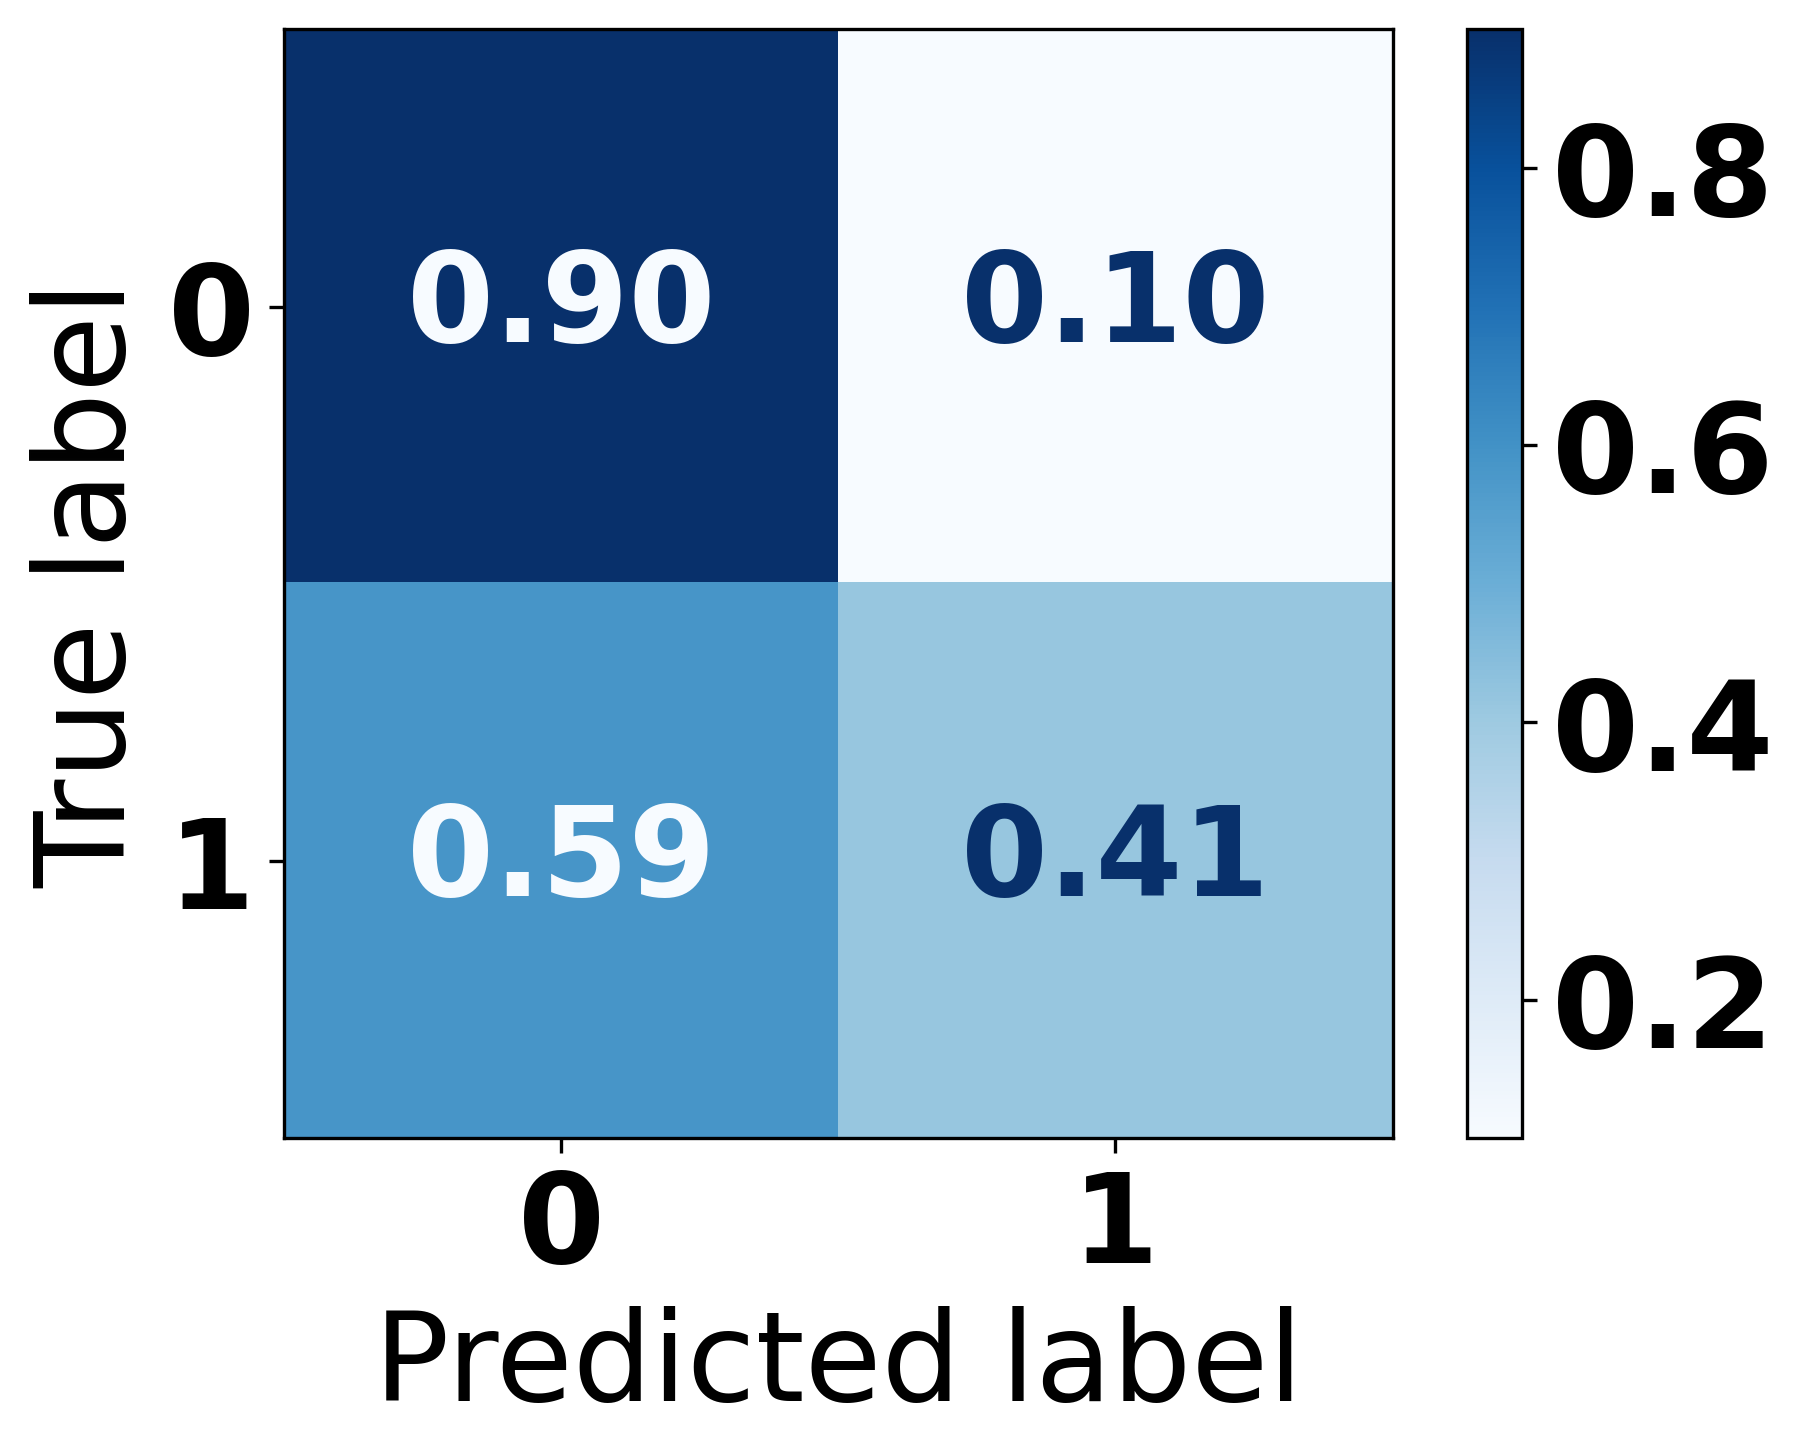

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.90      0.93    110005
     Class 1       0.20      0.41      0.27      6663

    accuracy                           0.87    116668
   macro avg       0.58      0.66      0.60    116668
weighted avg       0.92      0.87      0.89    116668

Train Accuracy: 0.9995619275189168
Test Accuracy: 0.8719271779751089


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

AUC Score: 0.6558319416026982


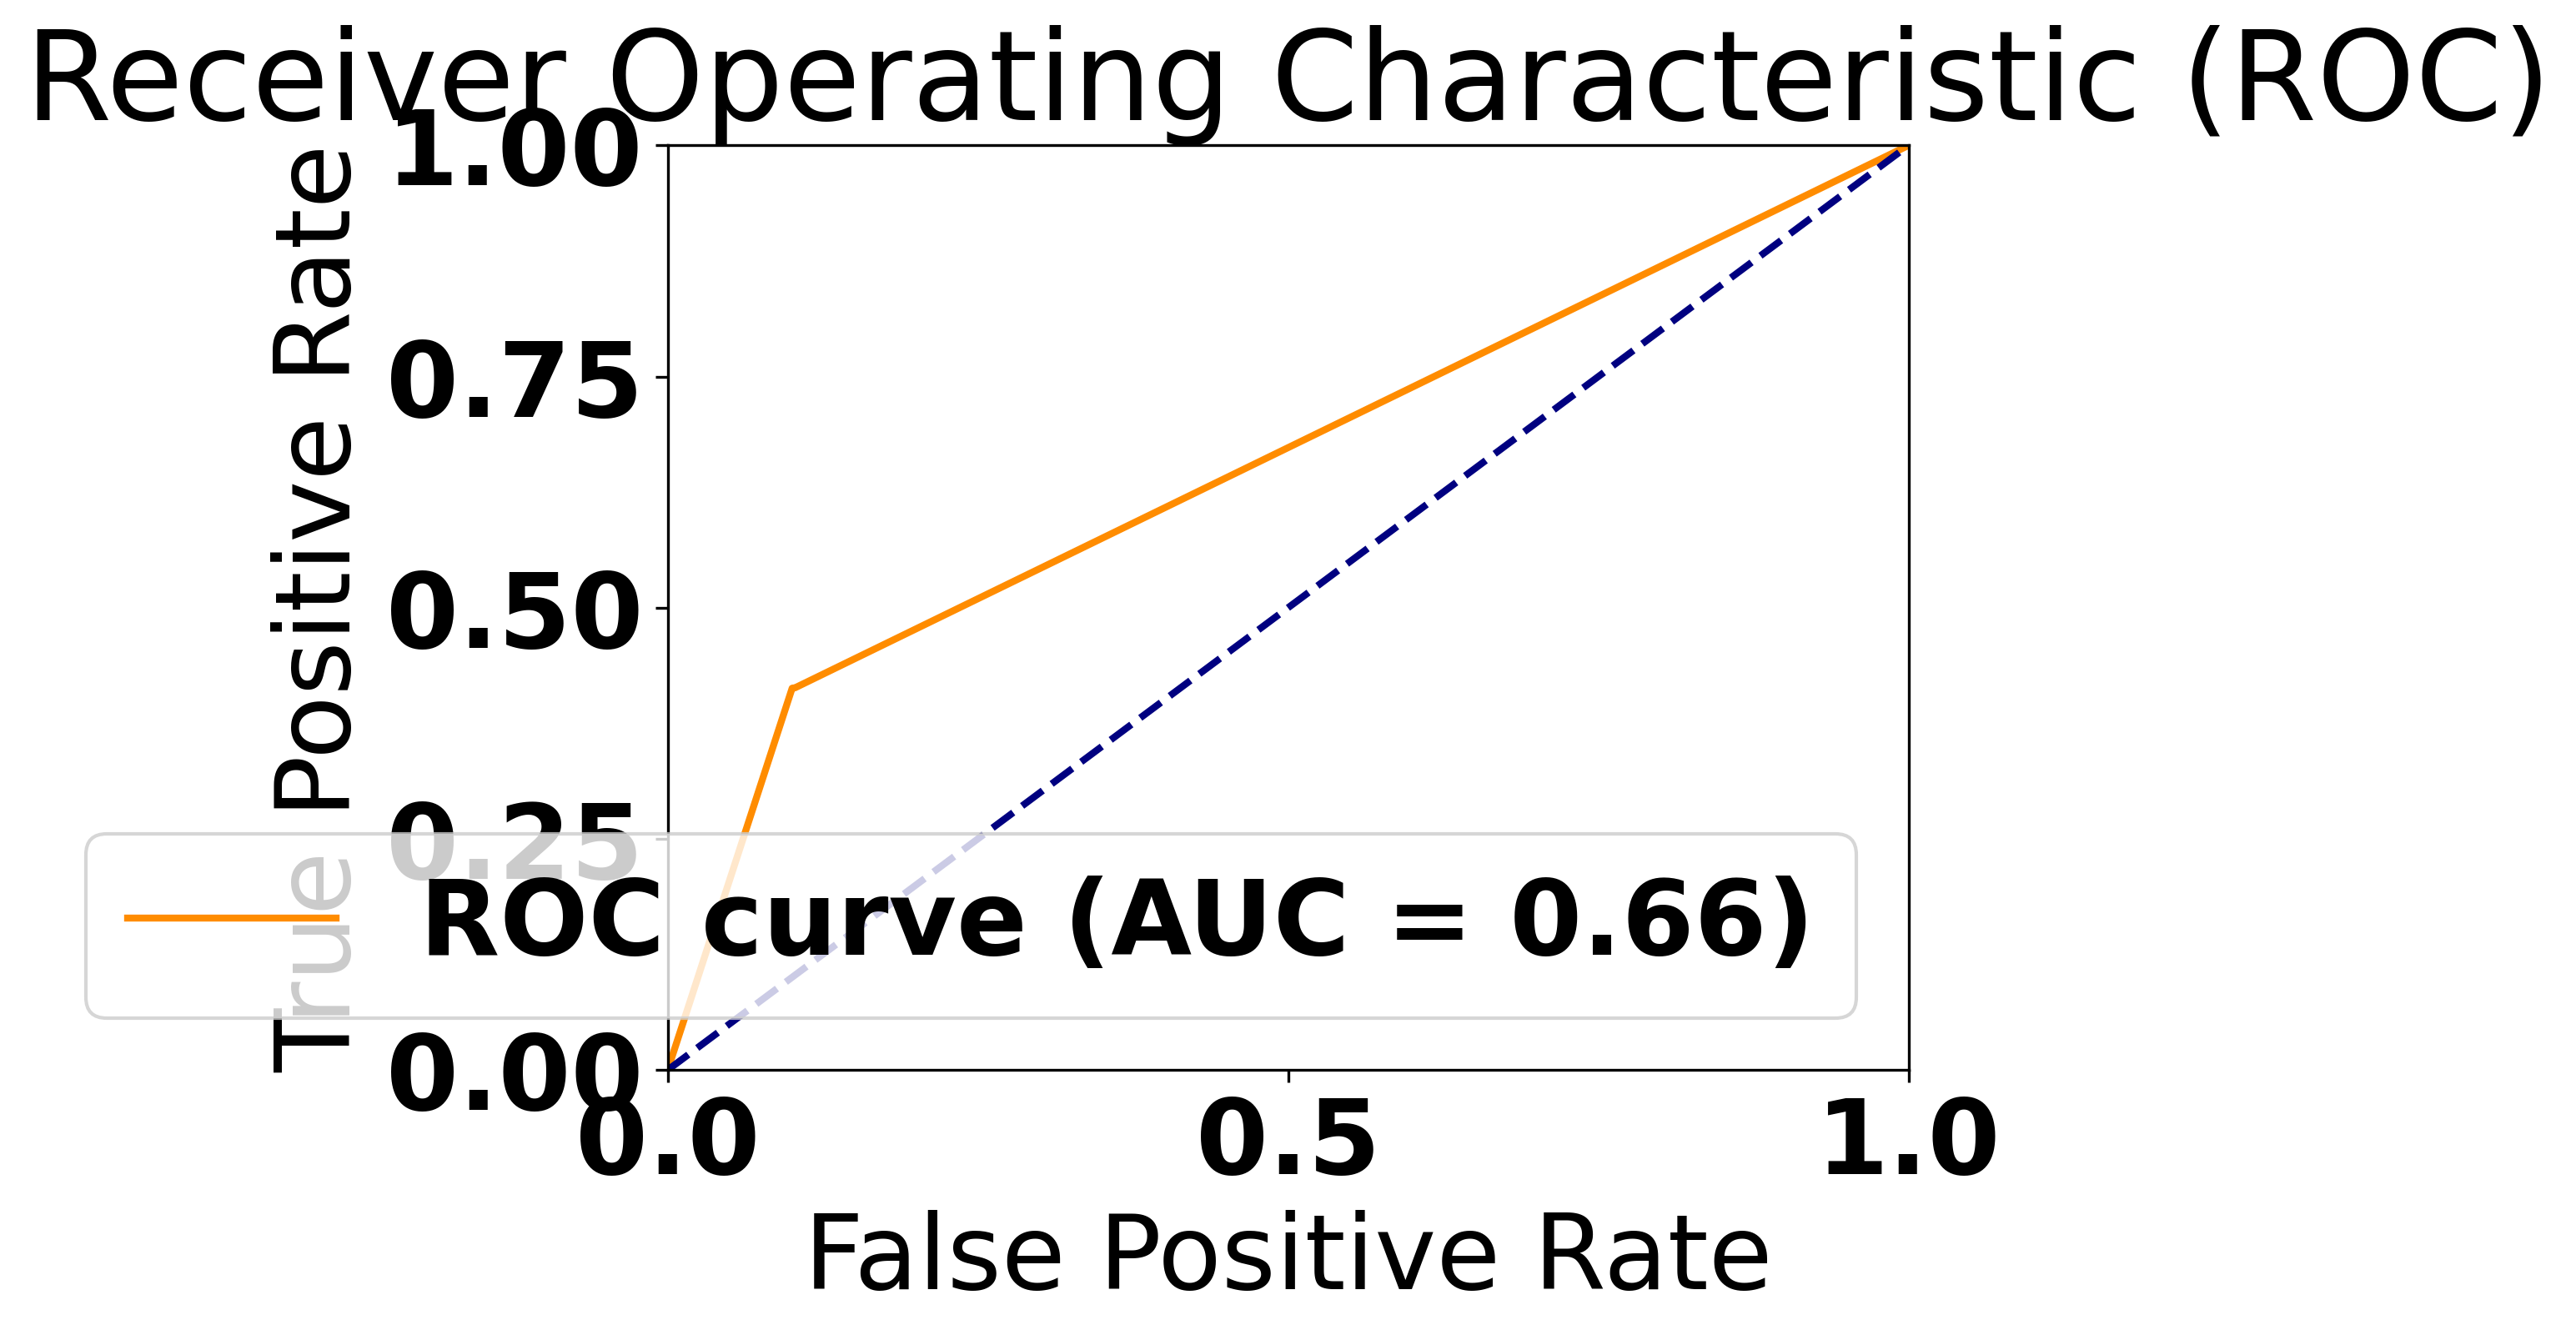

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Generate predicted probabilities
y_pred_proba = DT.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class (usually class 1)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

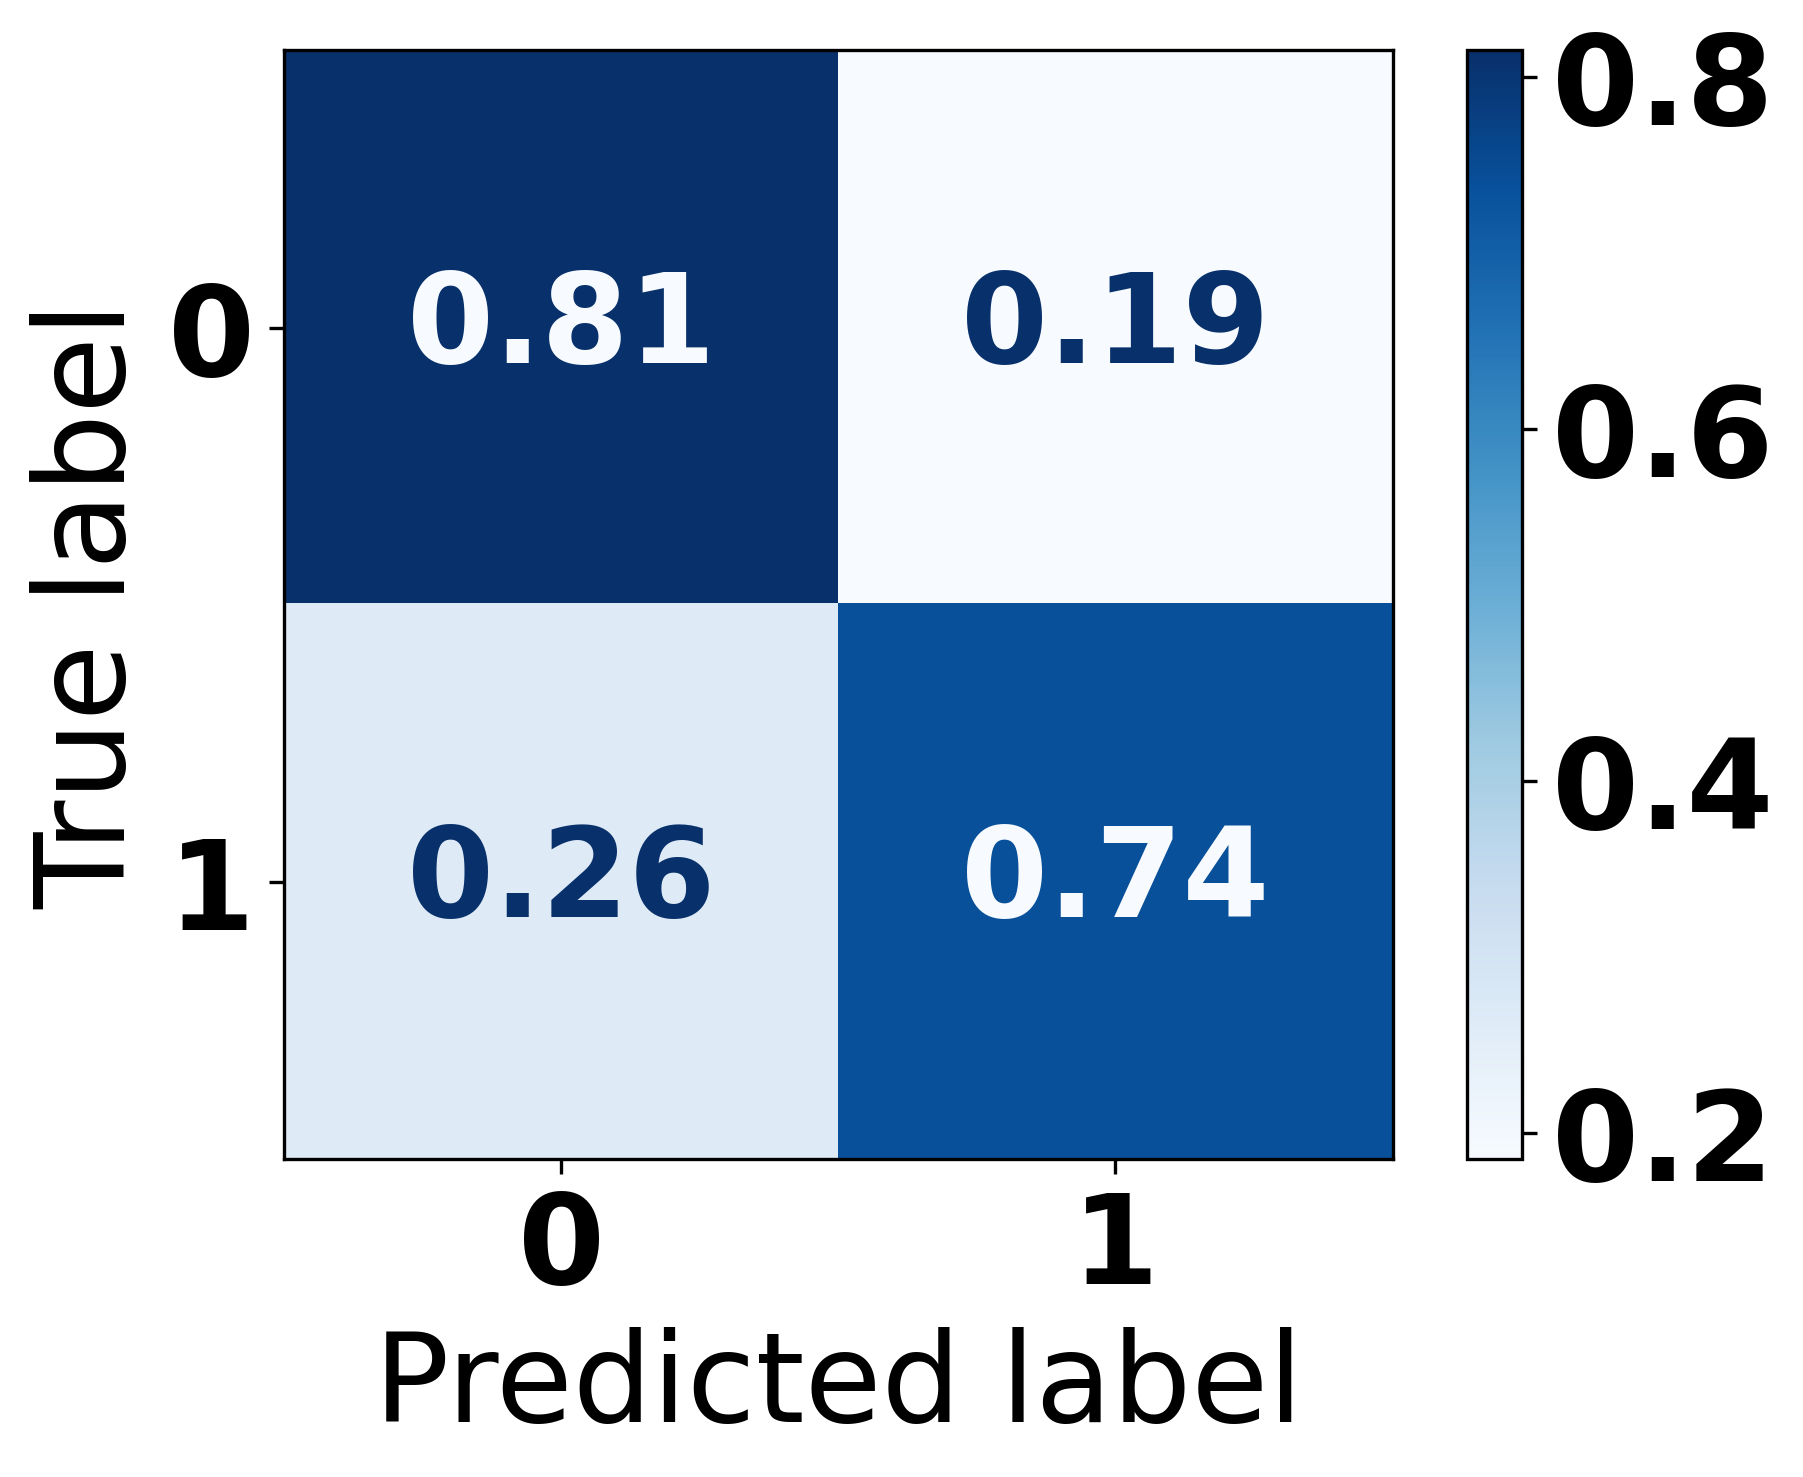

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.81      0.89    110005
     Class 1       0.19      0.74      0.31      6663

    accuracy                           0.81    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.81      0.86    116668

Train Accuracy: 0.8095818399044206
Test Accuracy: 0.8105221654609661


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

AUC Score: 0.8525163841248999


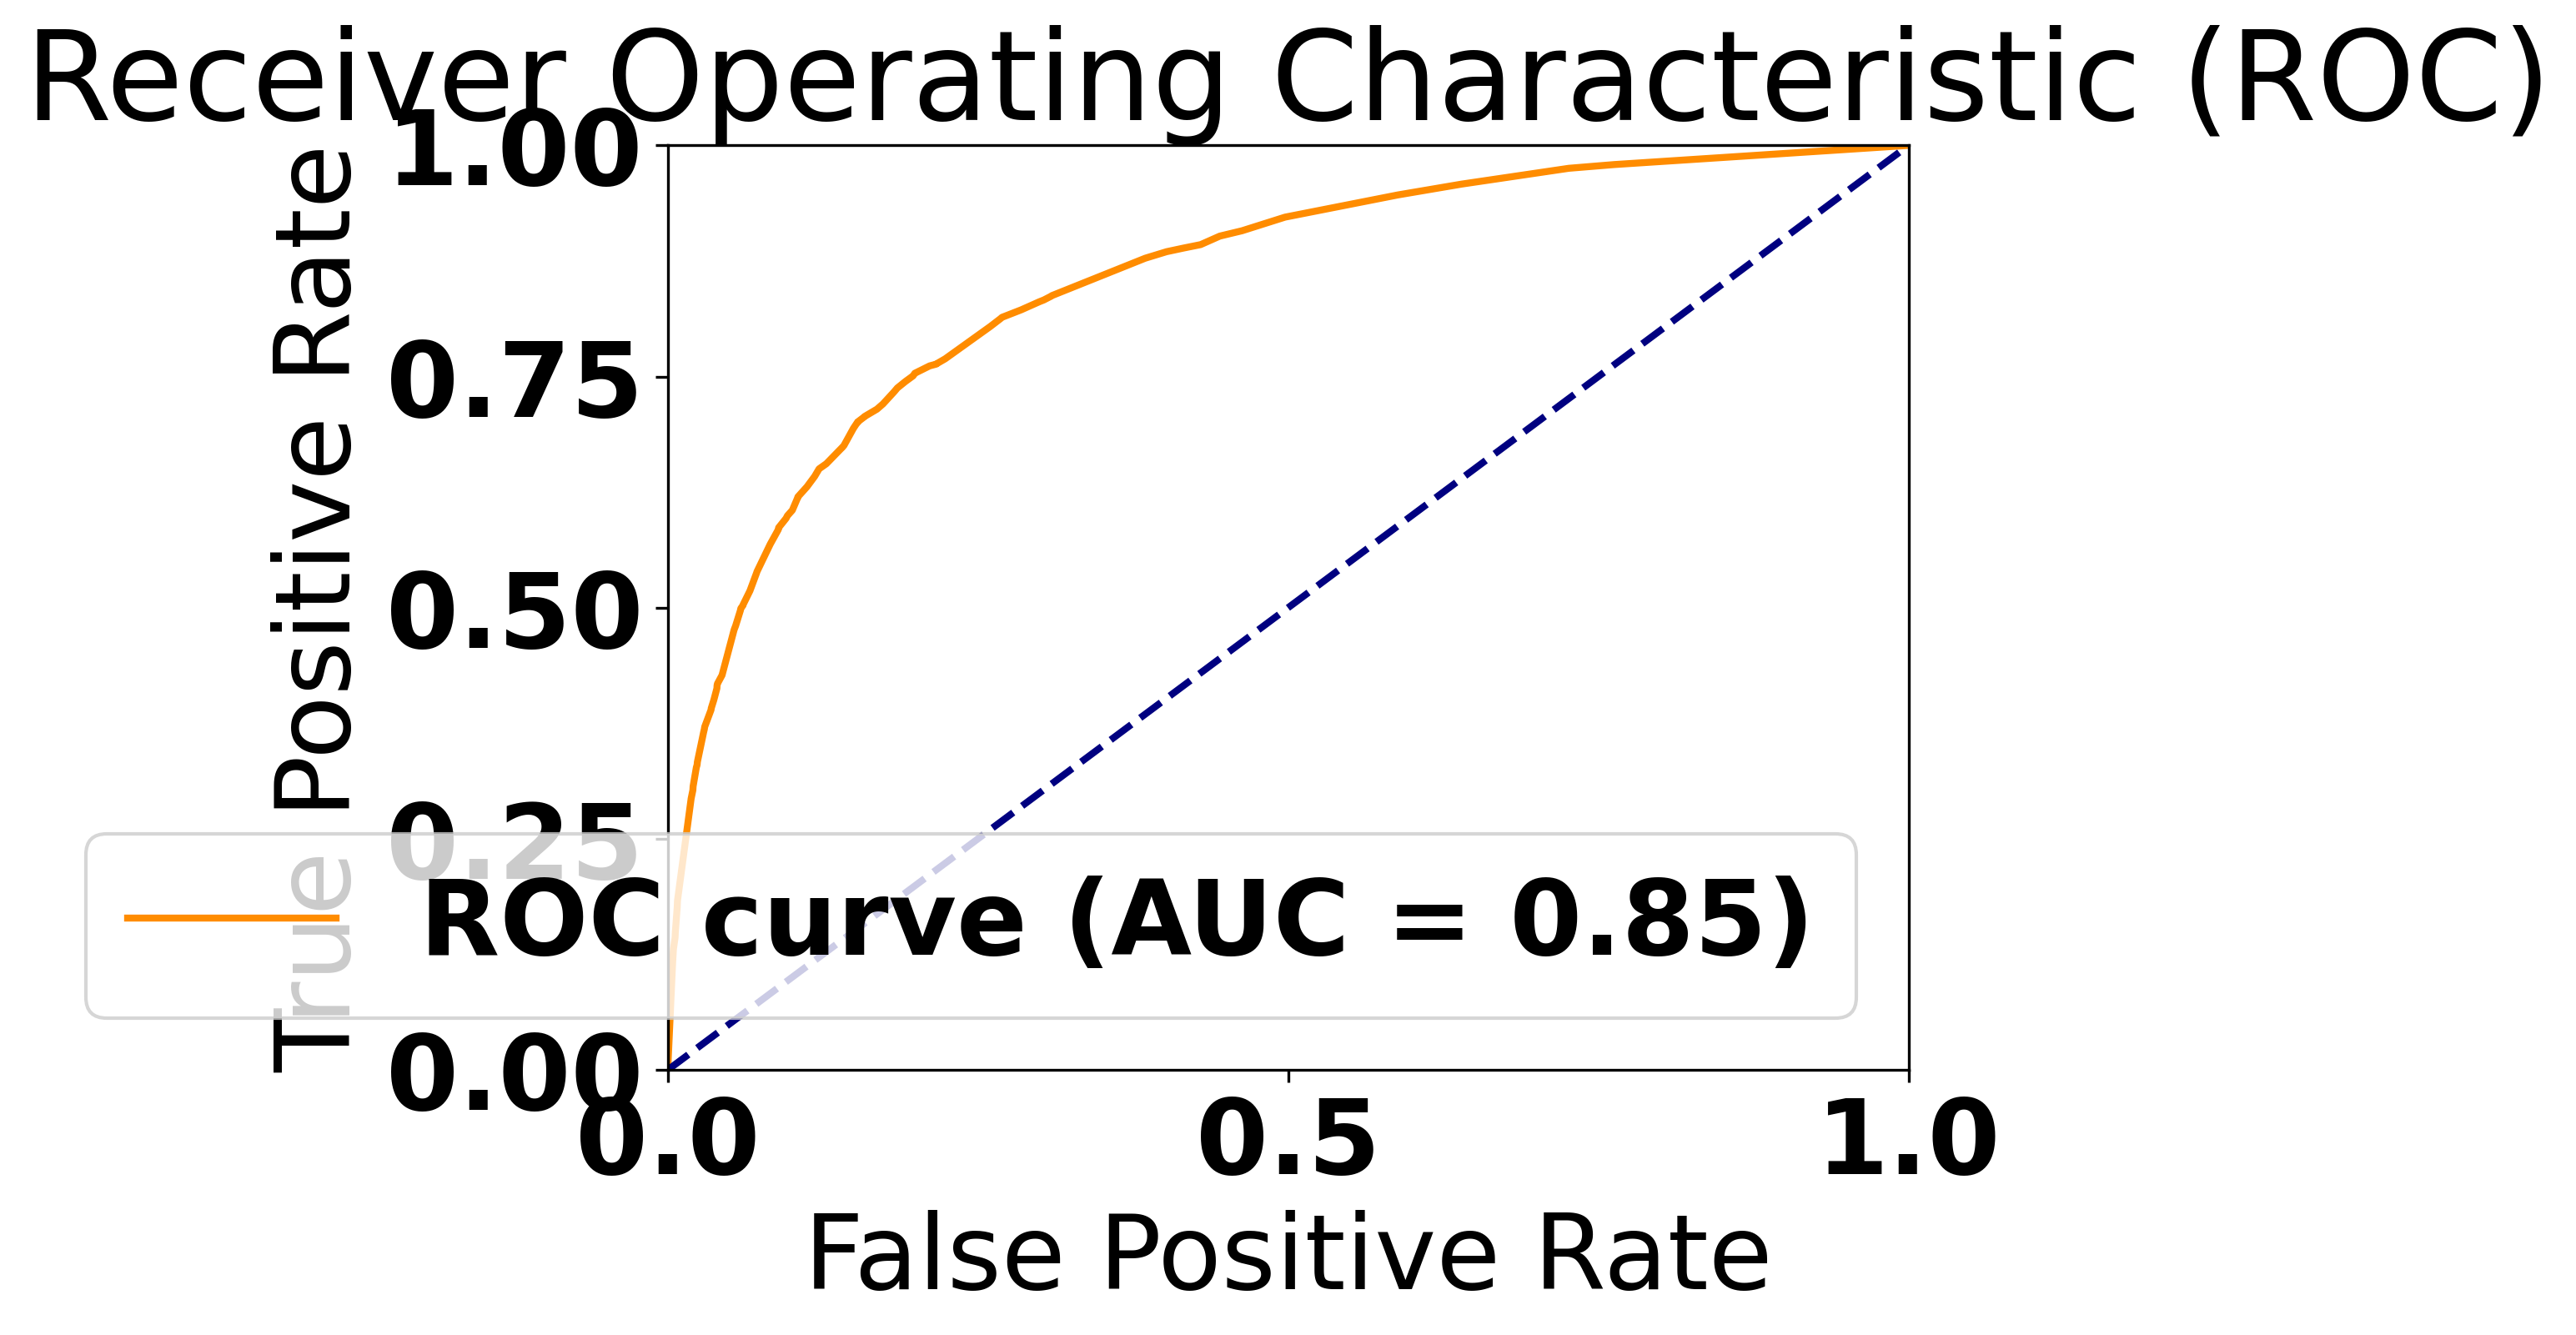

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = rusboost.predict_proba(x_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

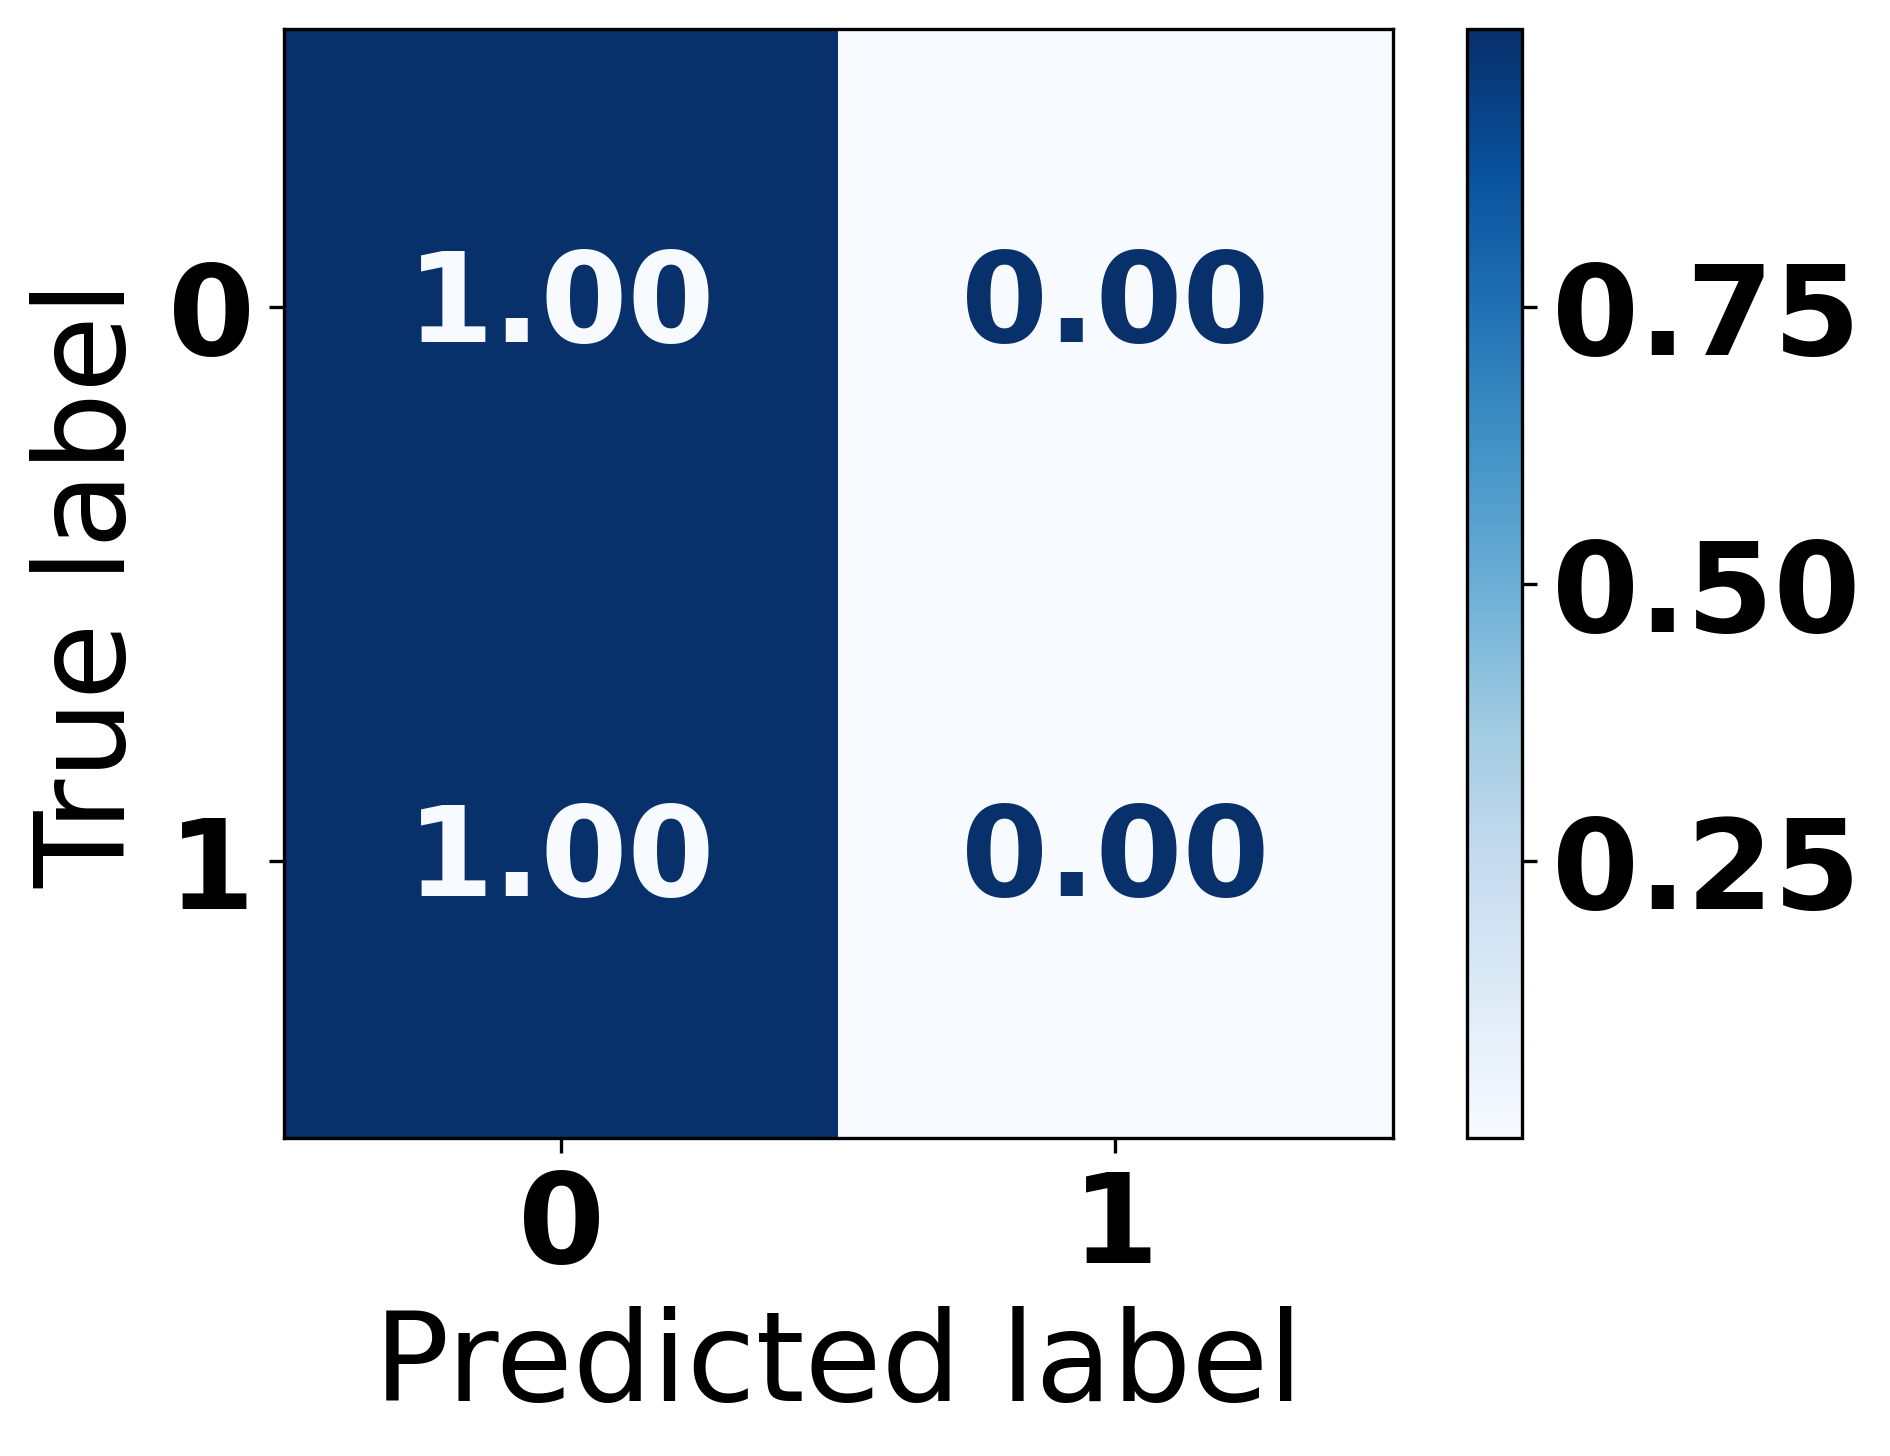

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    110005
           1       0.50      0.00      0.00      6663

    accuracy                           0.94    116668
   macro avg       0.72      0.50      0.49    116668
weighted avg       0.92      0.94      0.92    116668

Train Accuracy: 0.8762166467542811
Test Accuracy: 0.9428892241231529


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

AUC Score: 0.8552886886296622


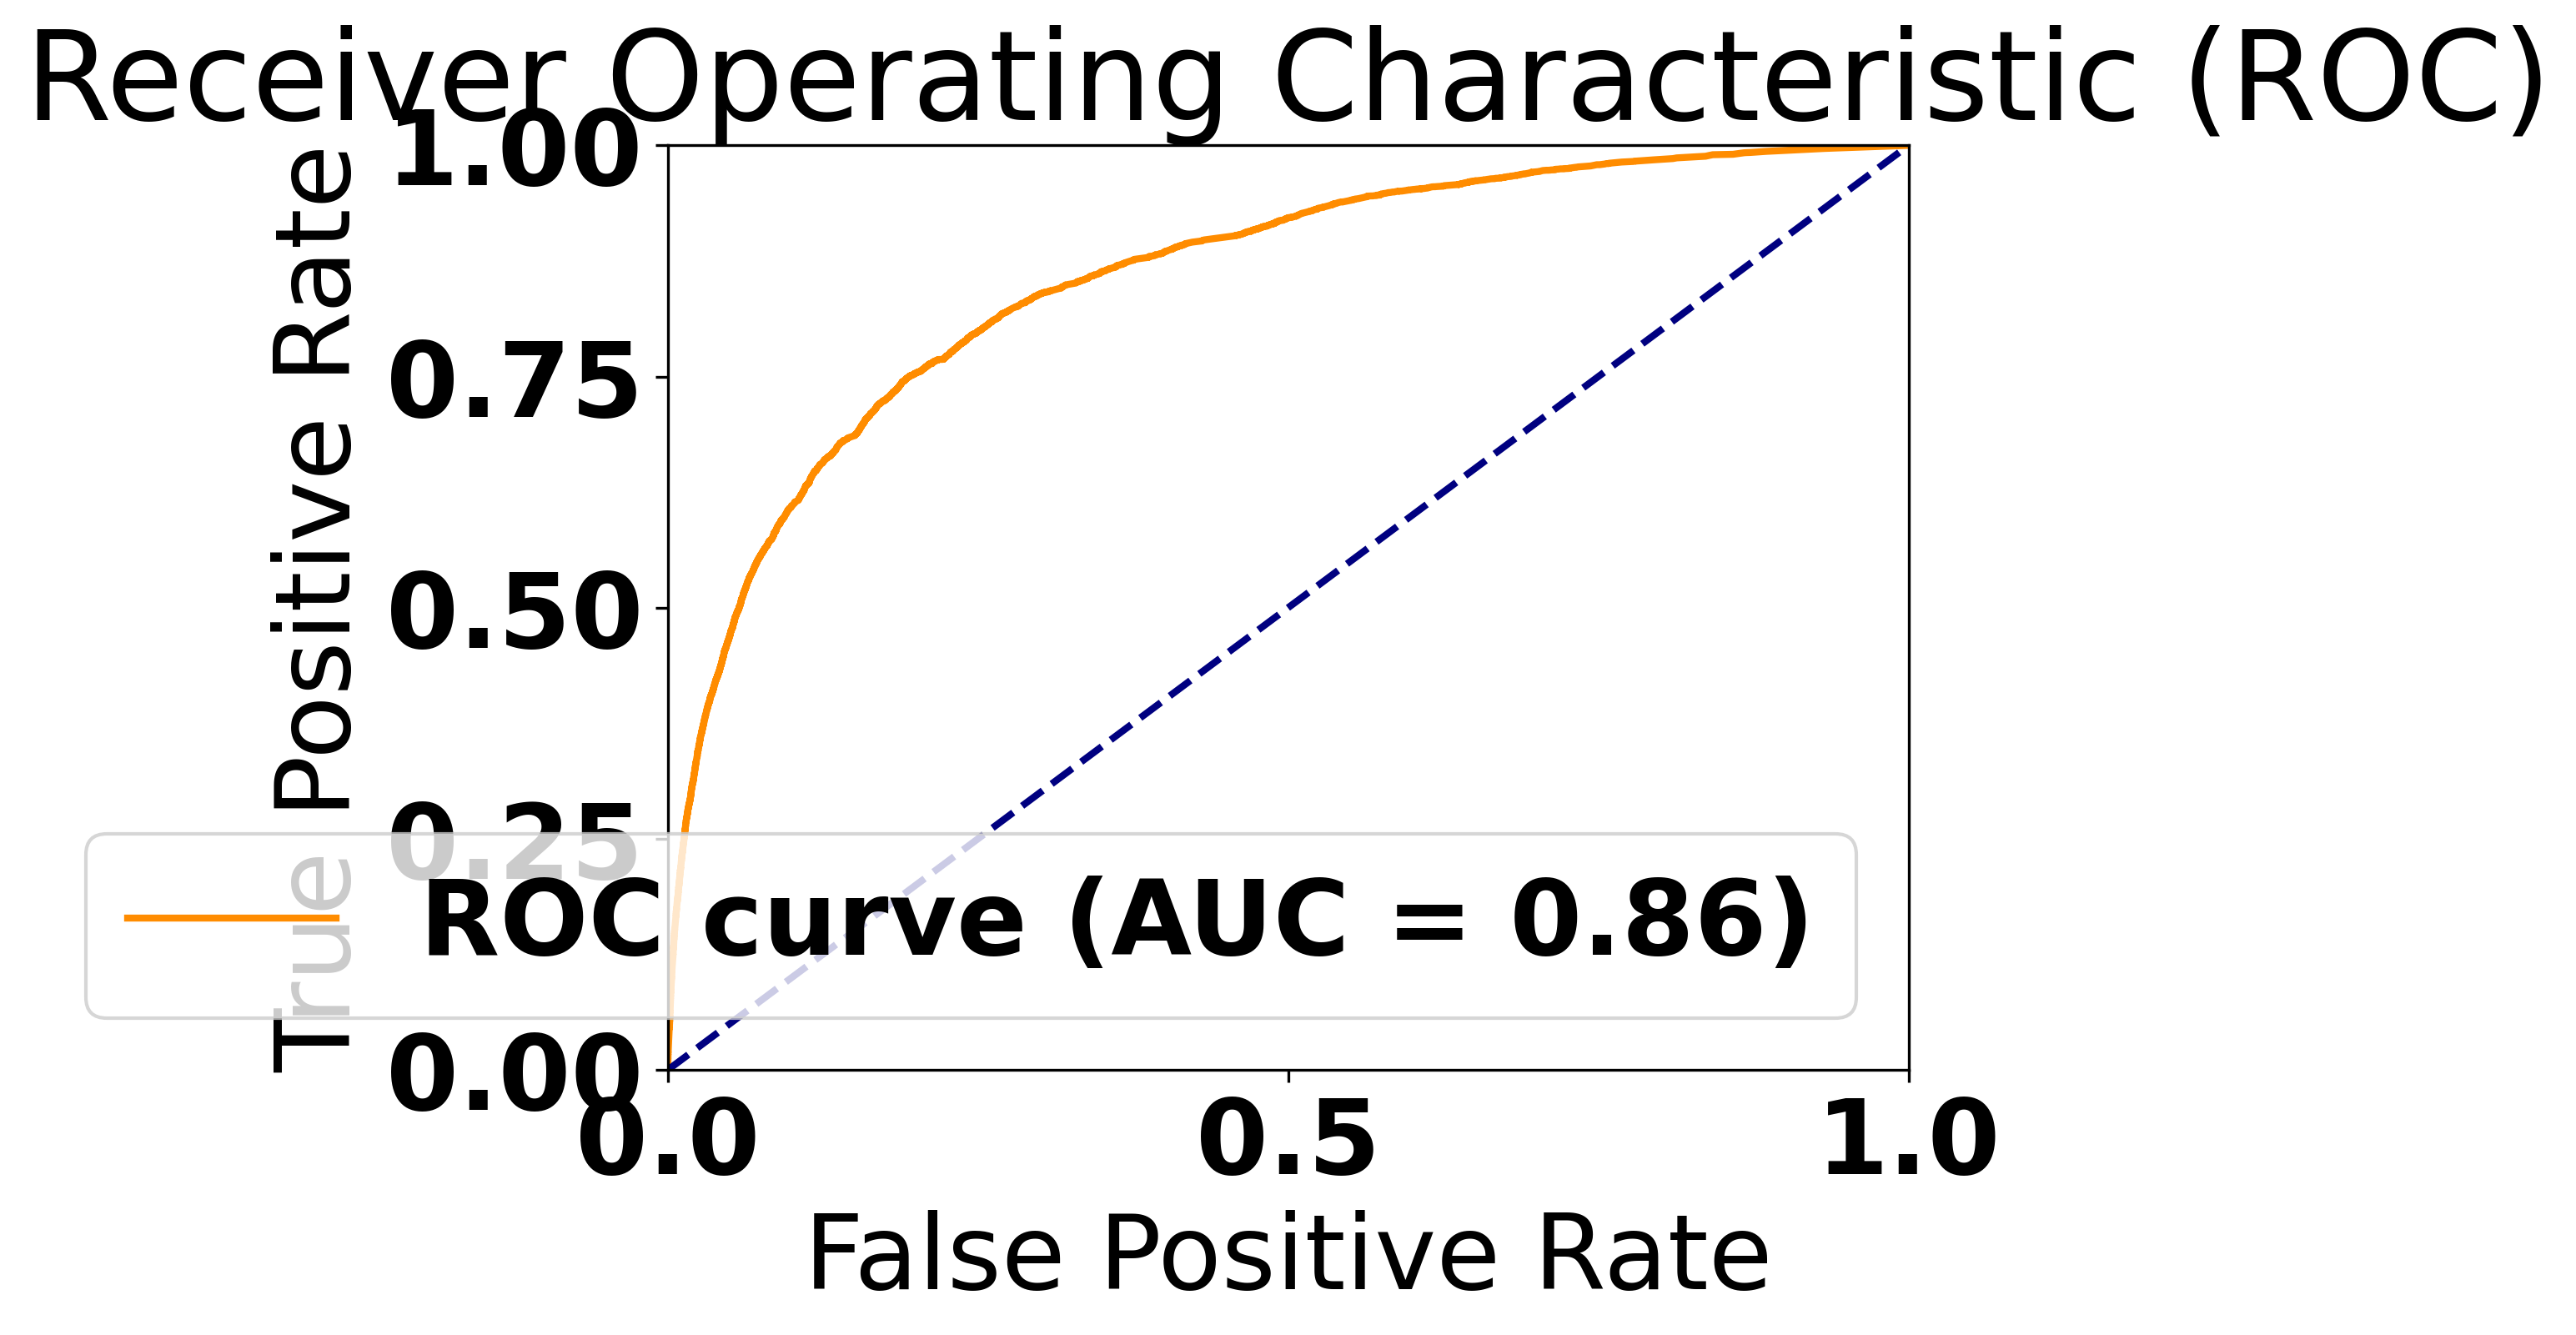

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = RF.predict_proba(x_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

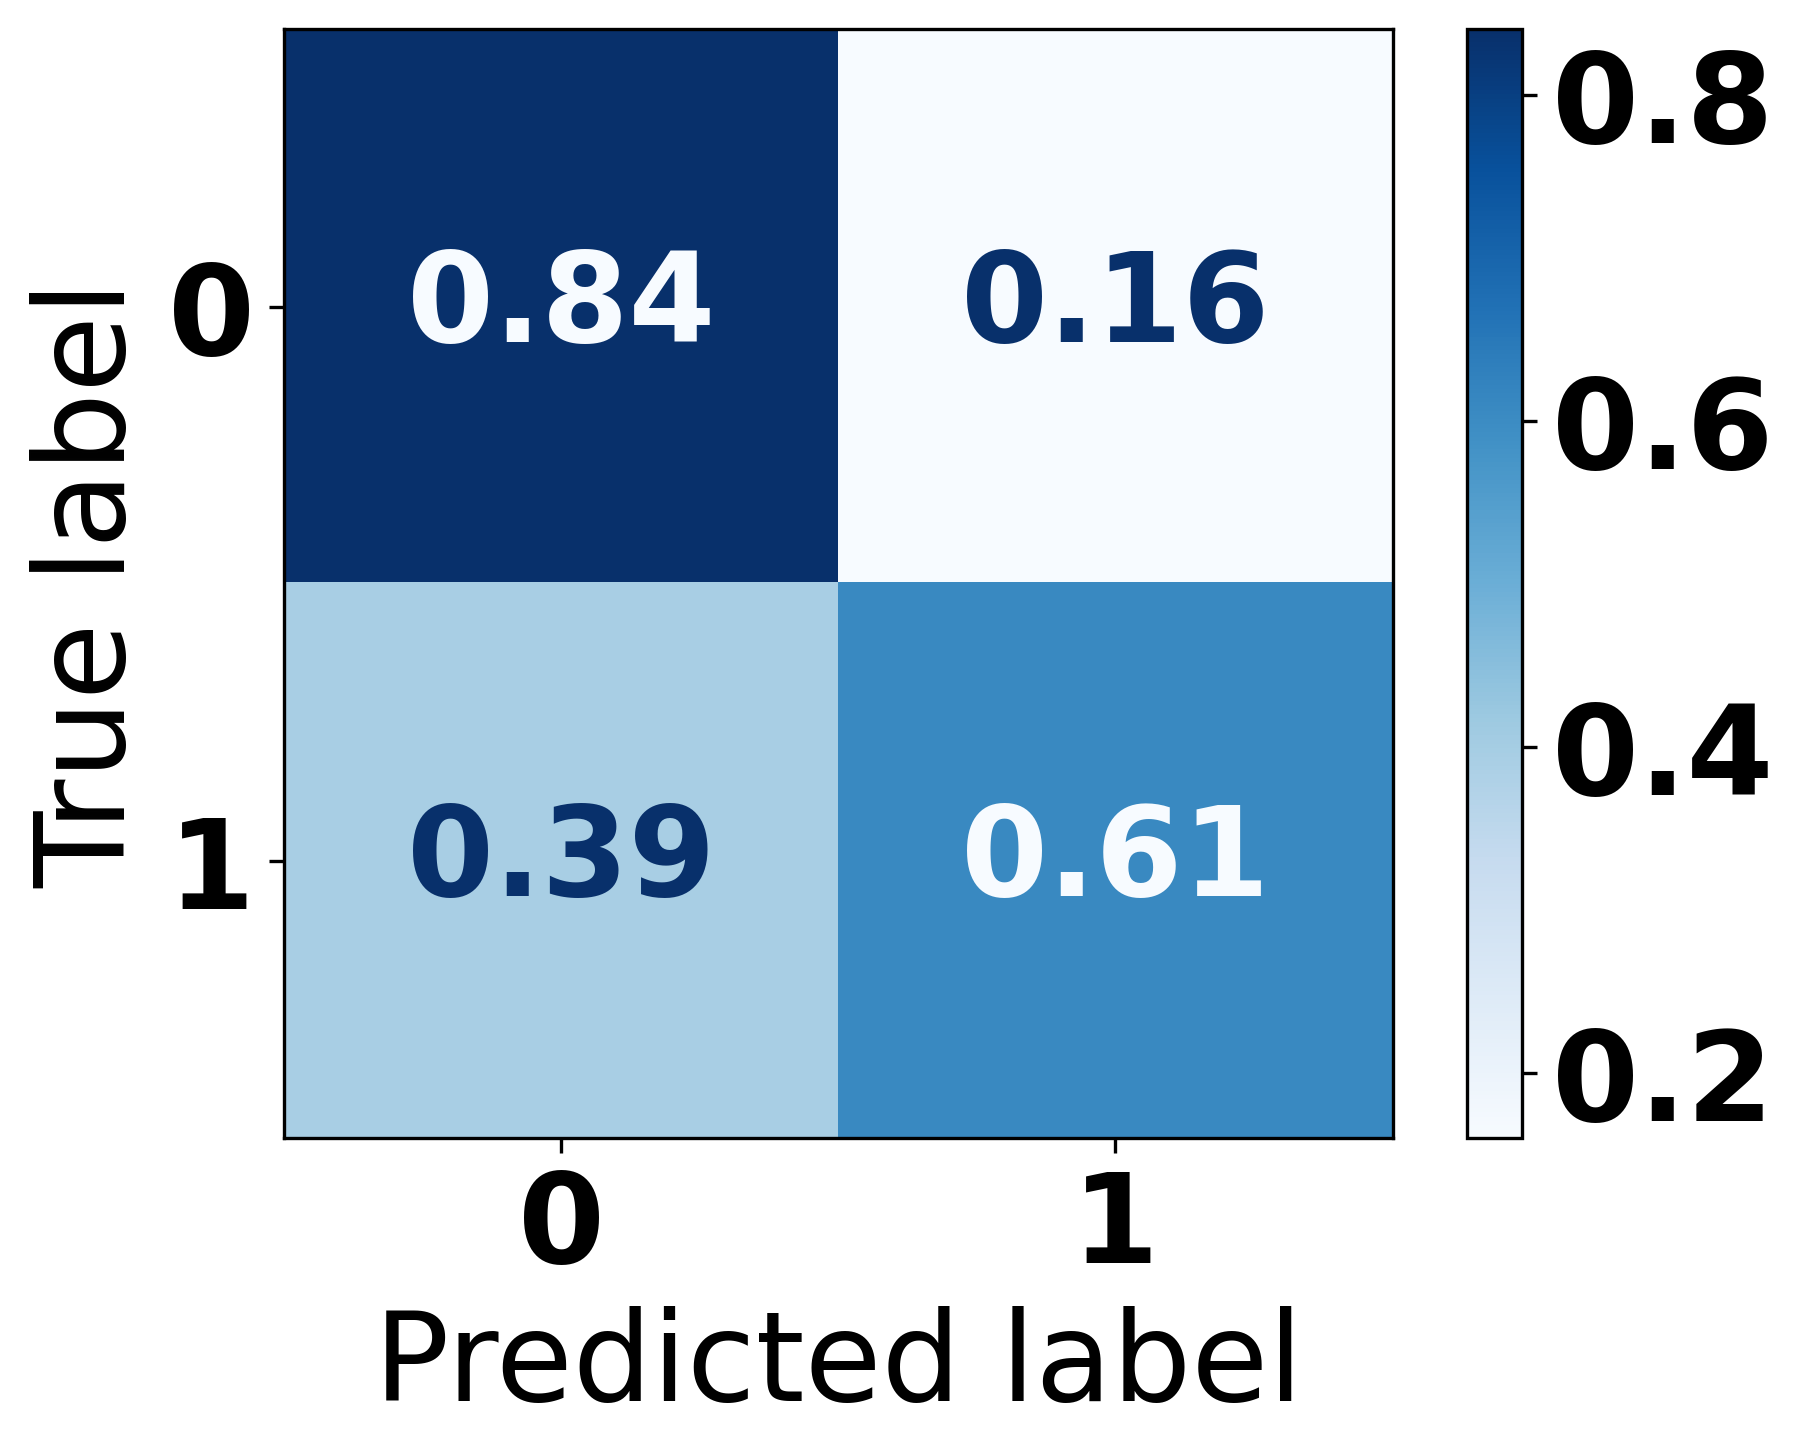

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90    110005
           1       0.19      0.61      0.29      6663

    accuracy                           0.83    116668
   macro avg       0.58      0.72      0.59    116668
weighted avg       0.93      0.83      0.87    116668

Train Accuracy: 0.812847471127041
Test Accuracy: 0.8266876949977715


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

AUC Score: 0.8235718045452248


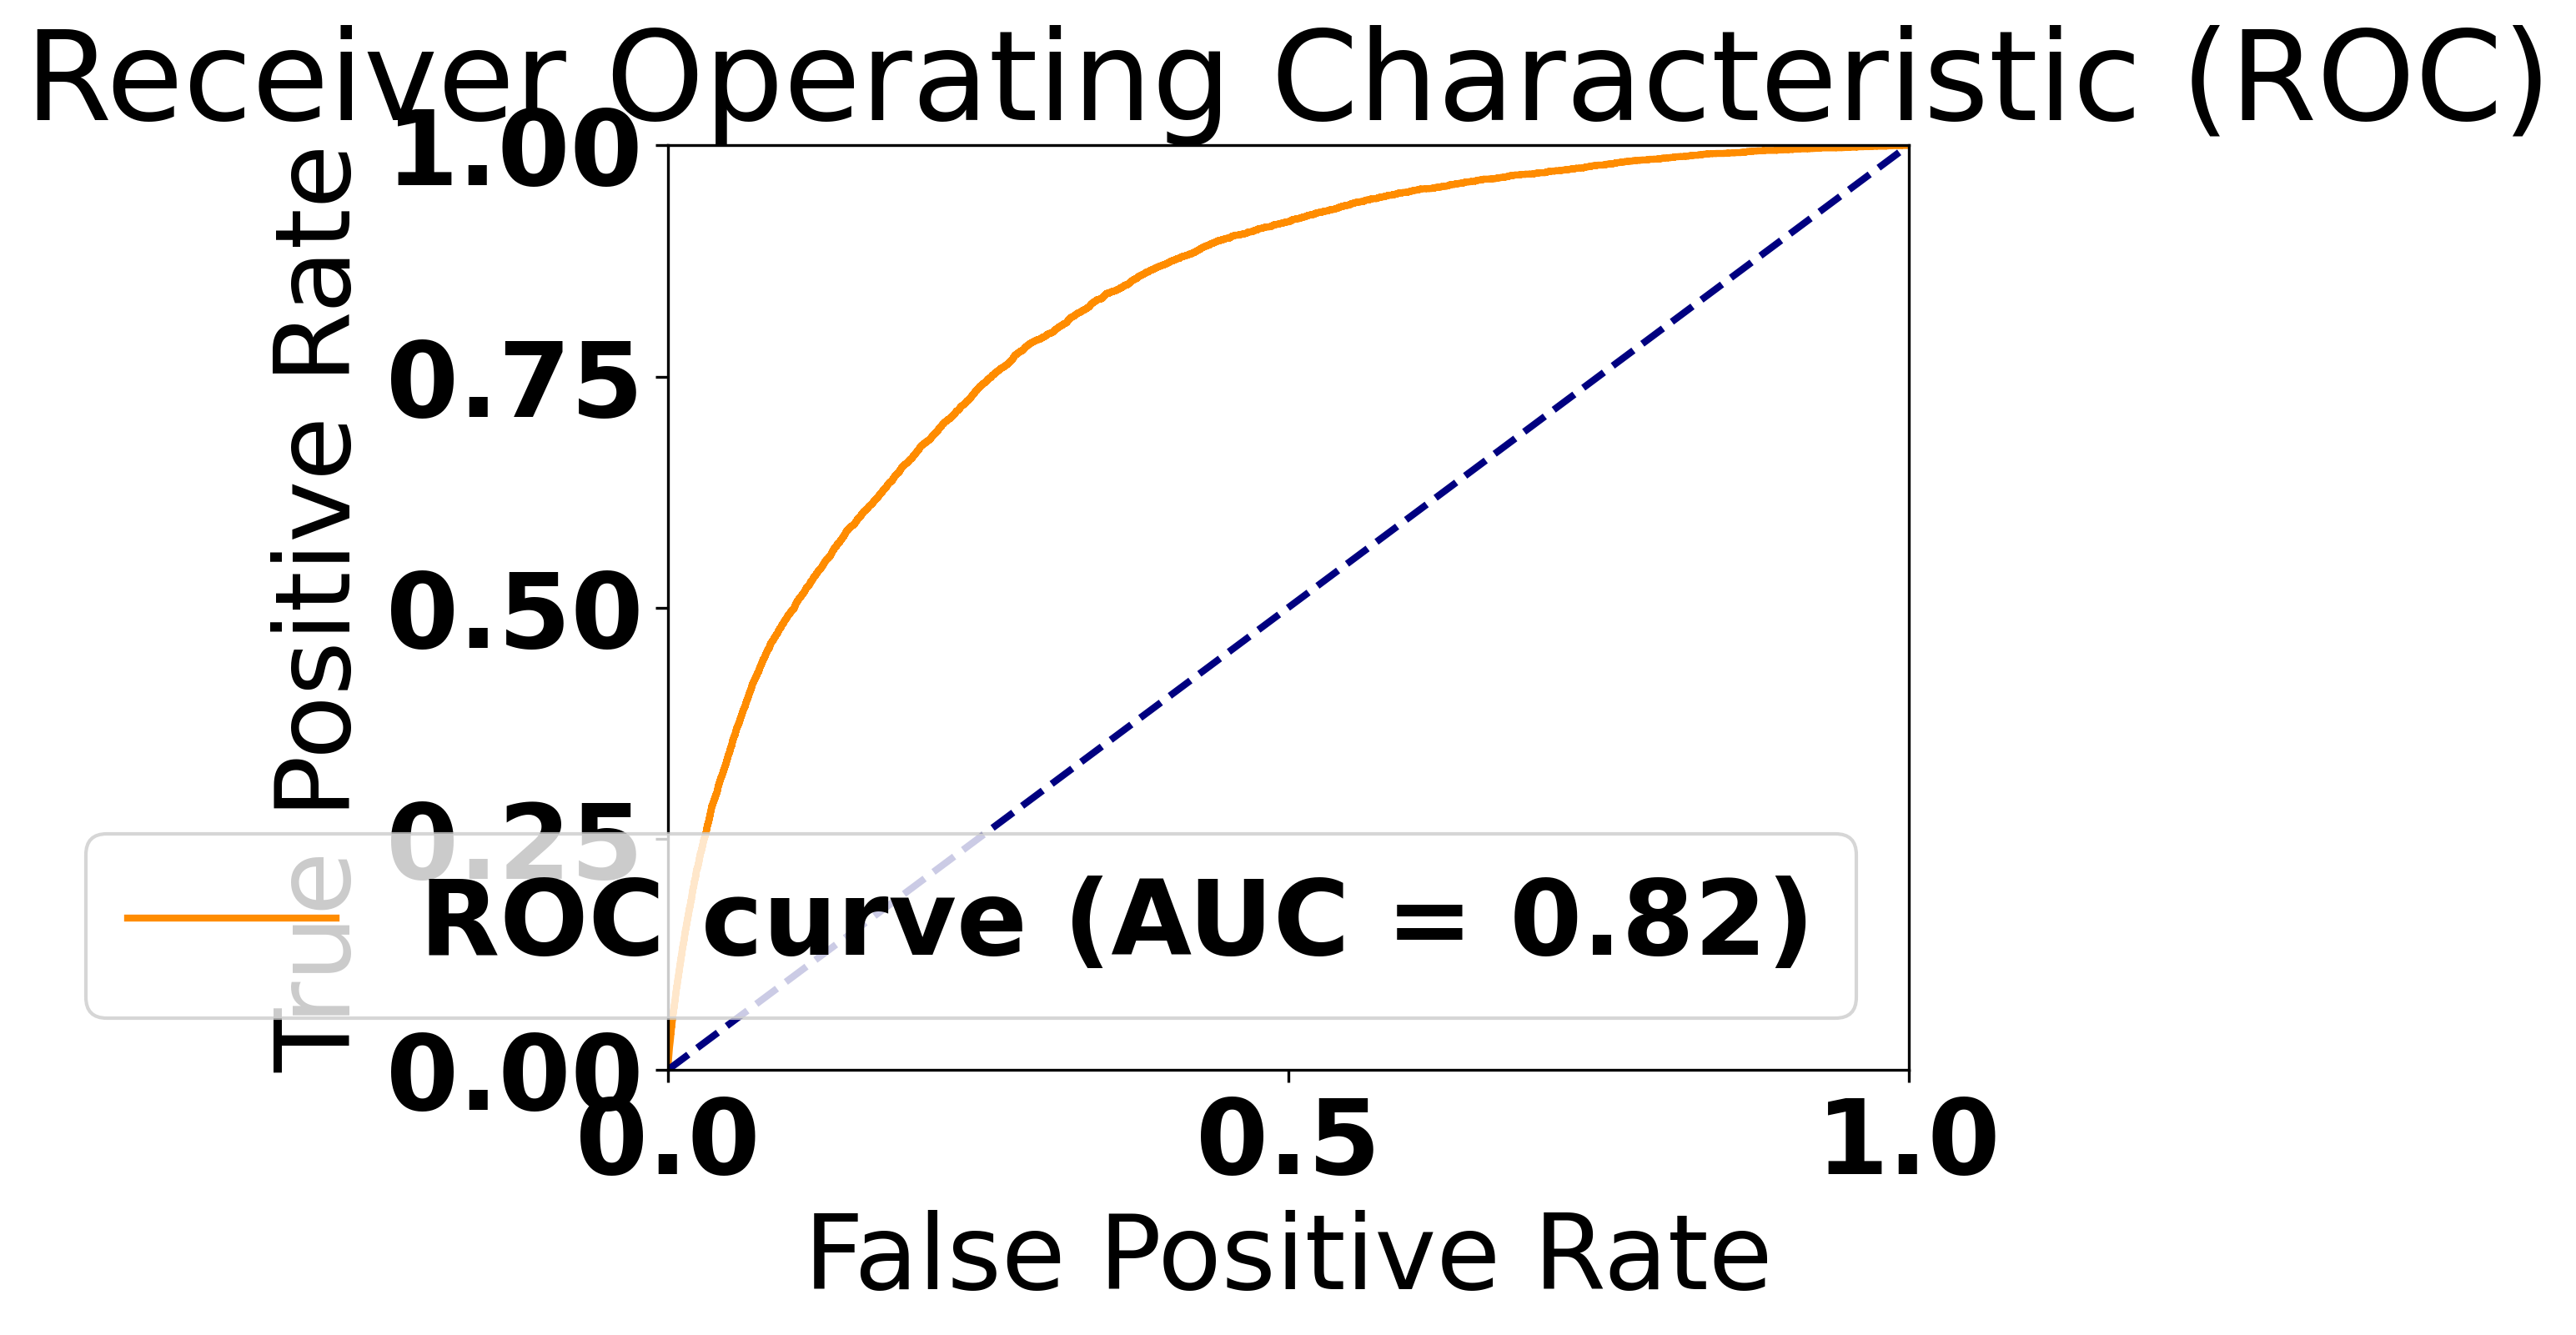

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = GNB.predict_proba(x_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

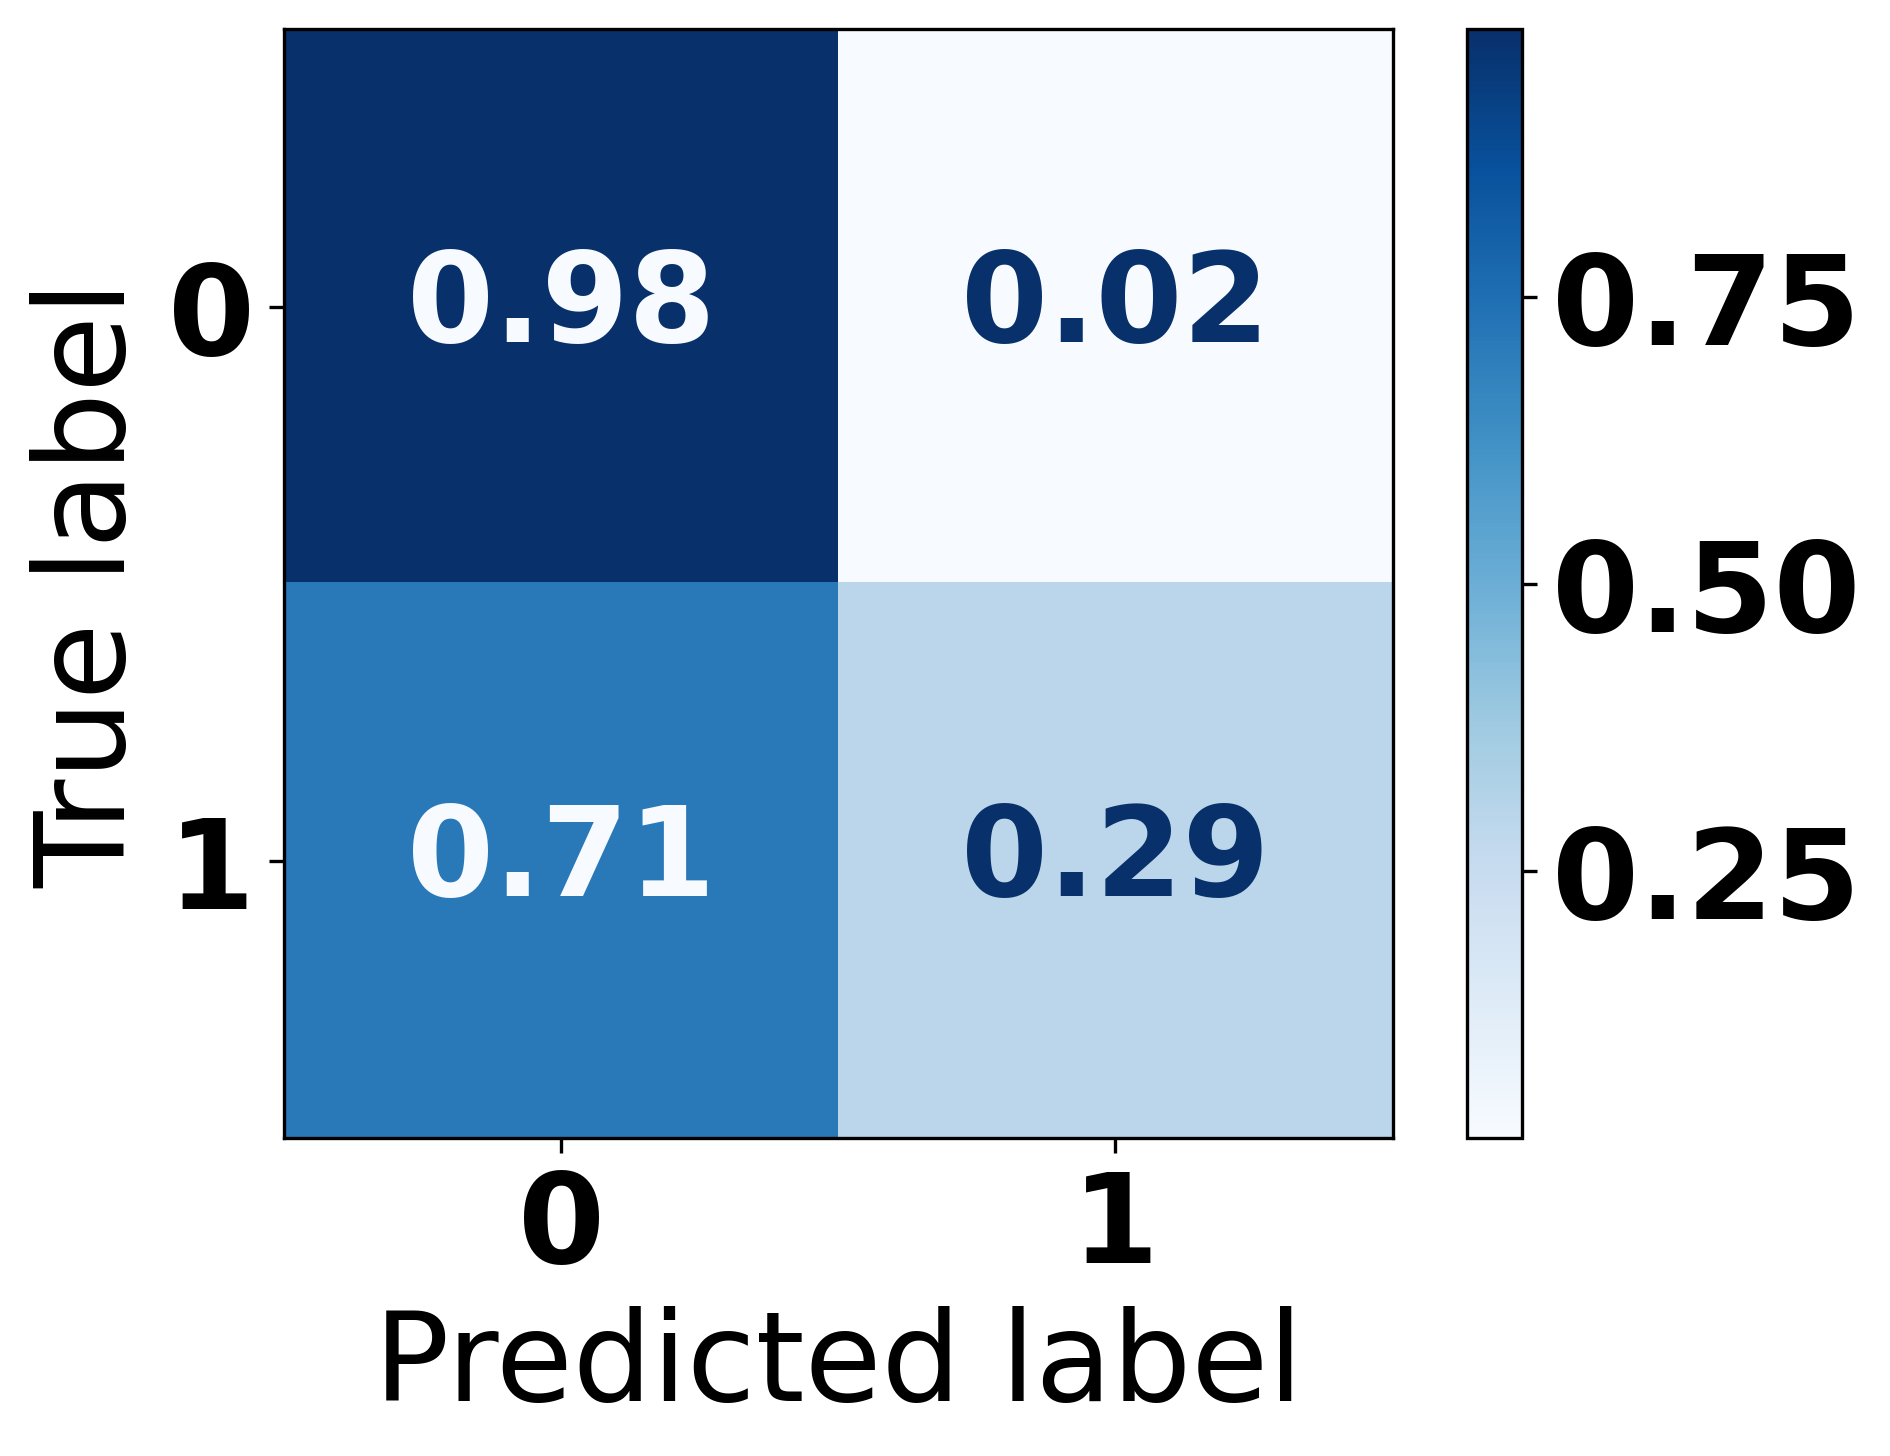

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    110005
           1       0.51      0.29      0.37      6663

    accuracy                           0.94    116668
   macro avg       0.73      0.64      0.67    116668
weighted avg       0.93      0.94      0.94    116668

Train Accuracy: 0.8950139386698527
Test Accuracy: 0.9432835053313676


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=17, learning_rate=0.4, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

AUC Score: 0.8610484734832875


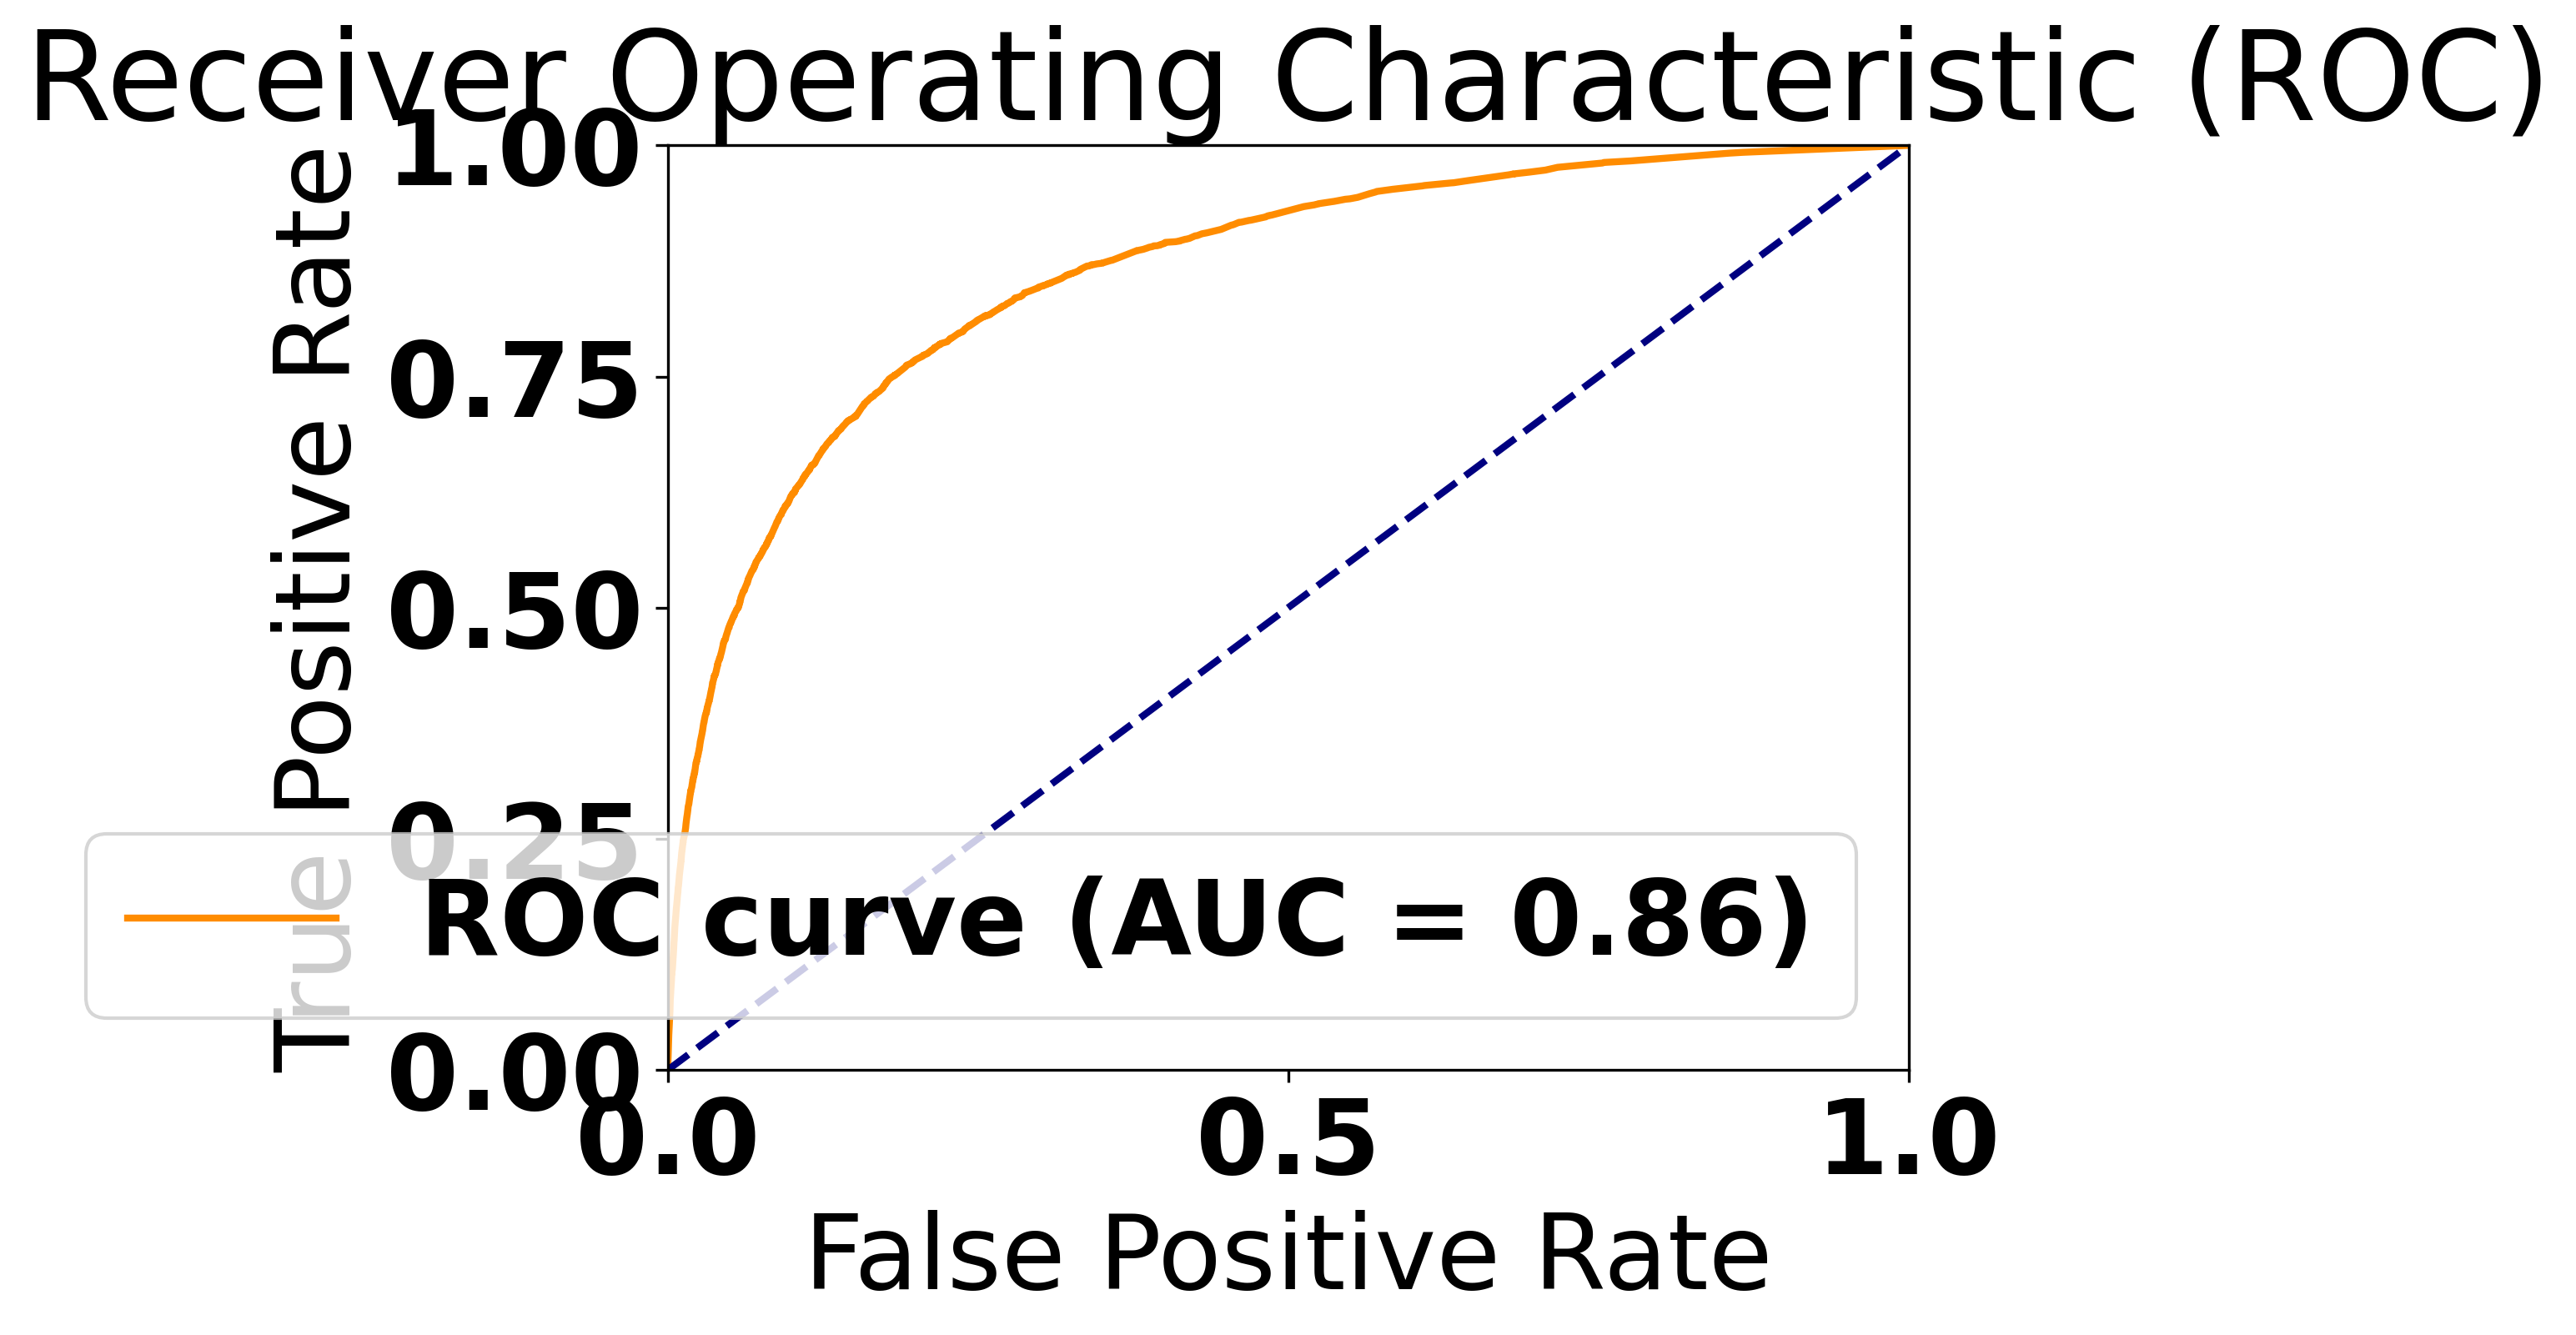

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = Adaboost.predict_proba(x_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Deep Learning Approach

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.96957411 0.03042589]
 [0.59852919 0.40147081]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97    110005
     Class 1       0.44      0.40      0.42      6663

    accuracy                           0.94    116668
   macro avg       0.70      0.69      0.69    116668
weighted avg       0.93      0.94      0.94    116668



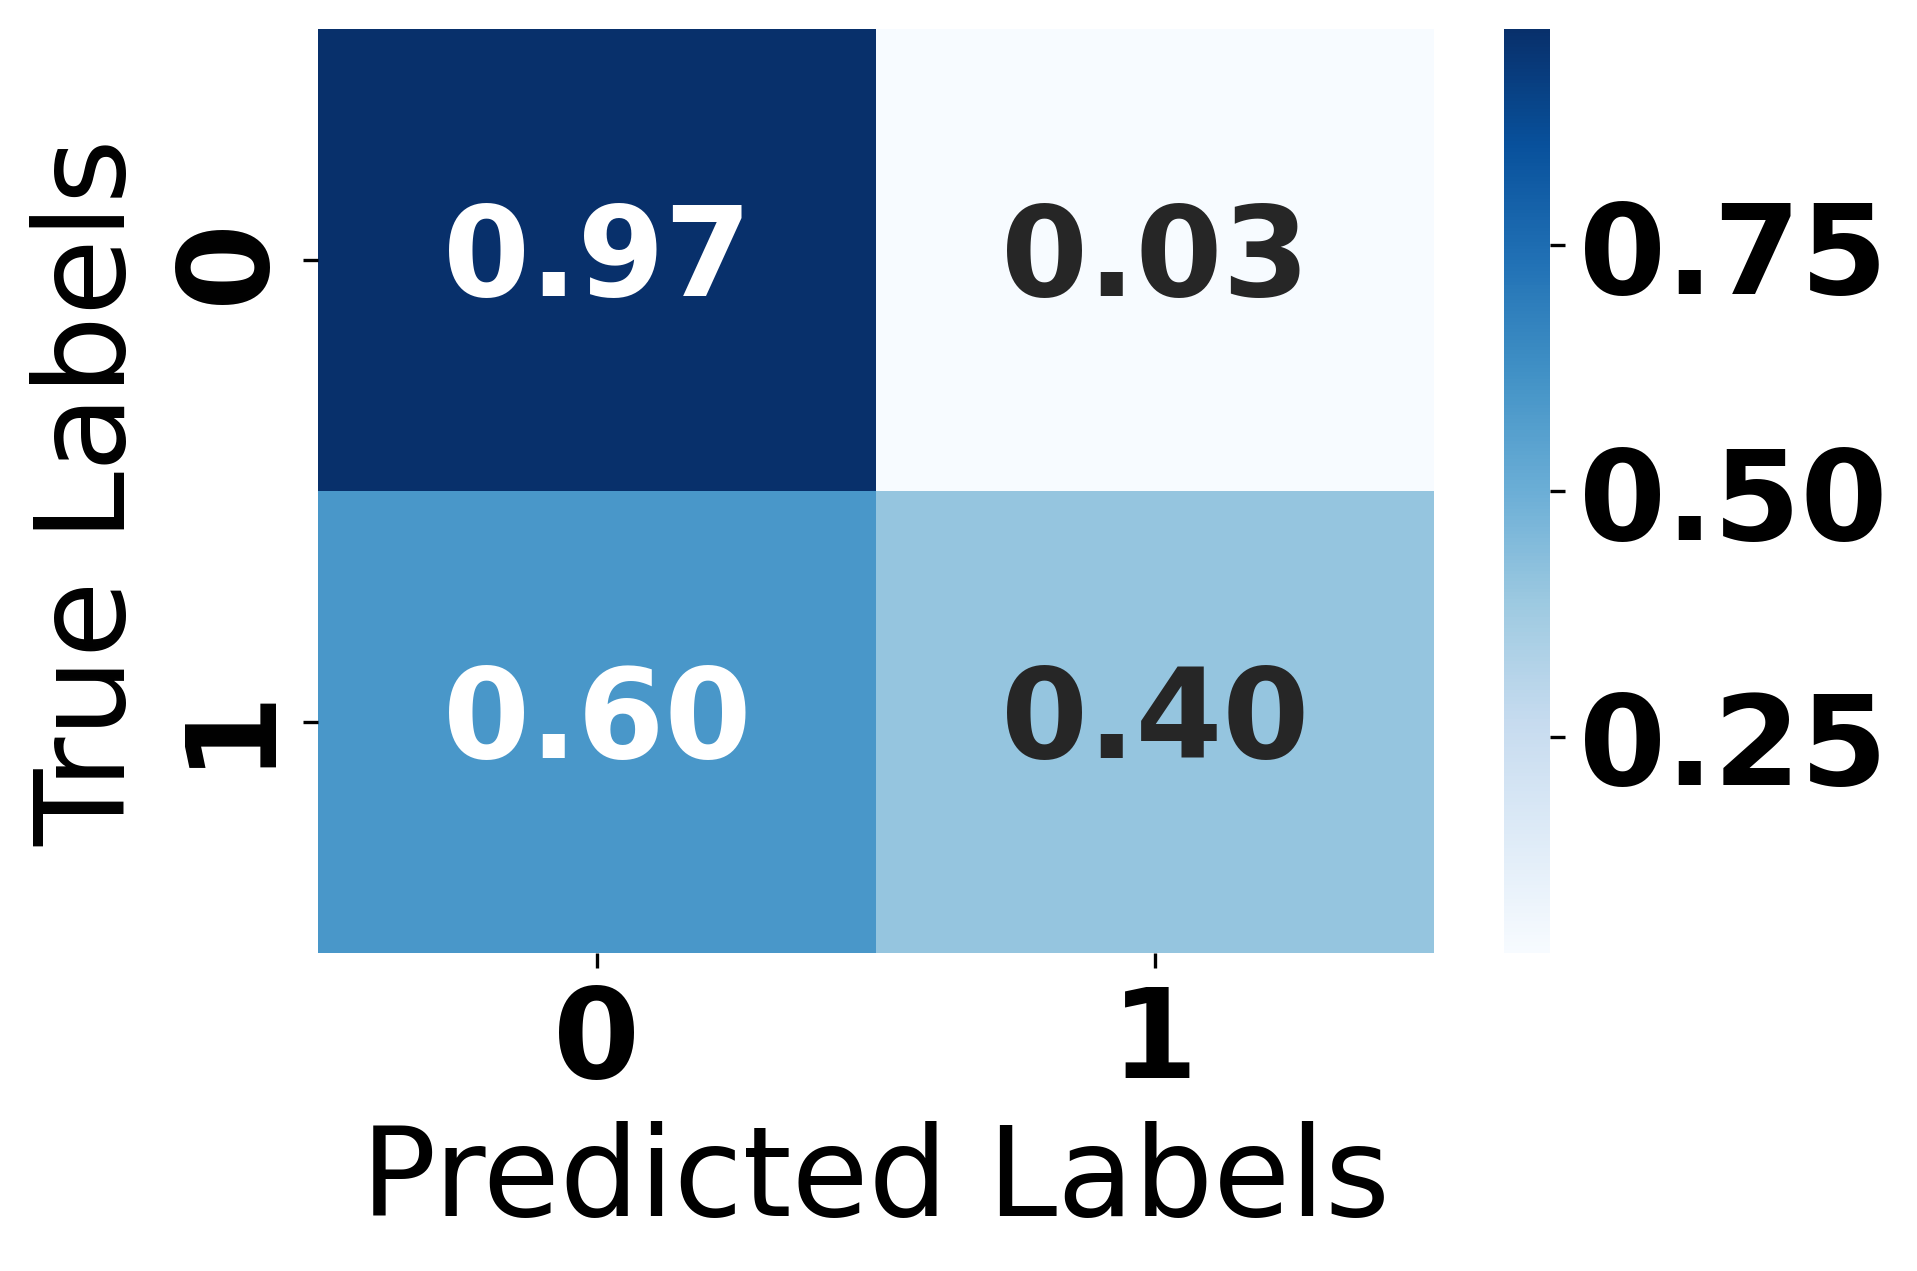

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

AUC Score: 0.8667481366376433


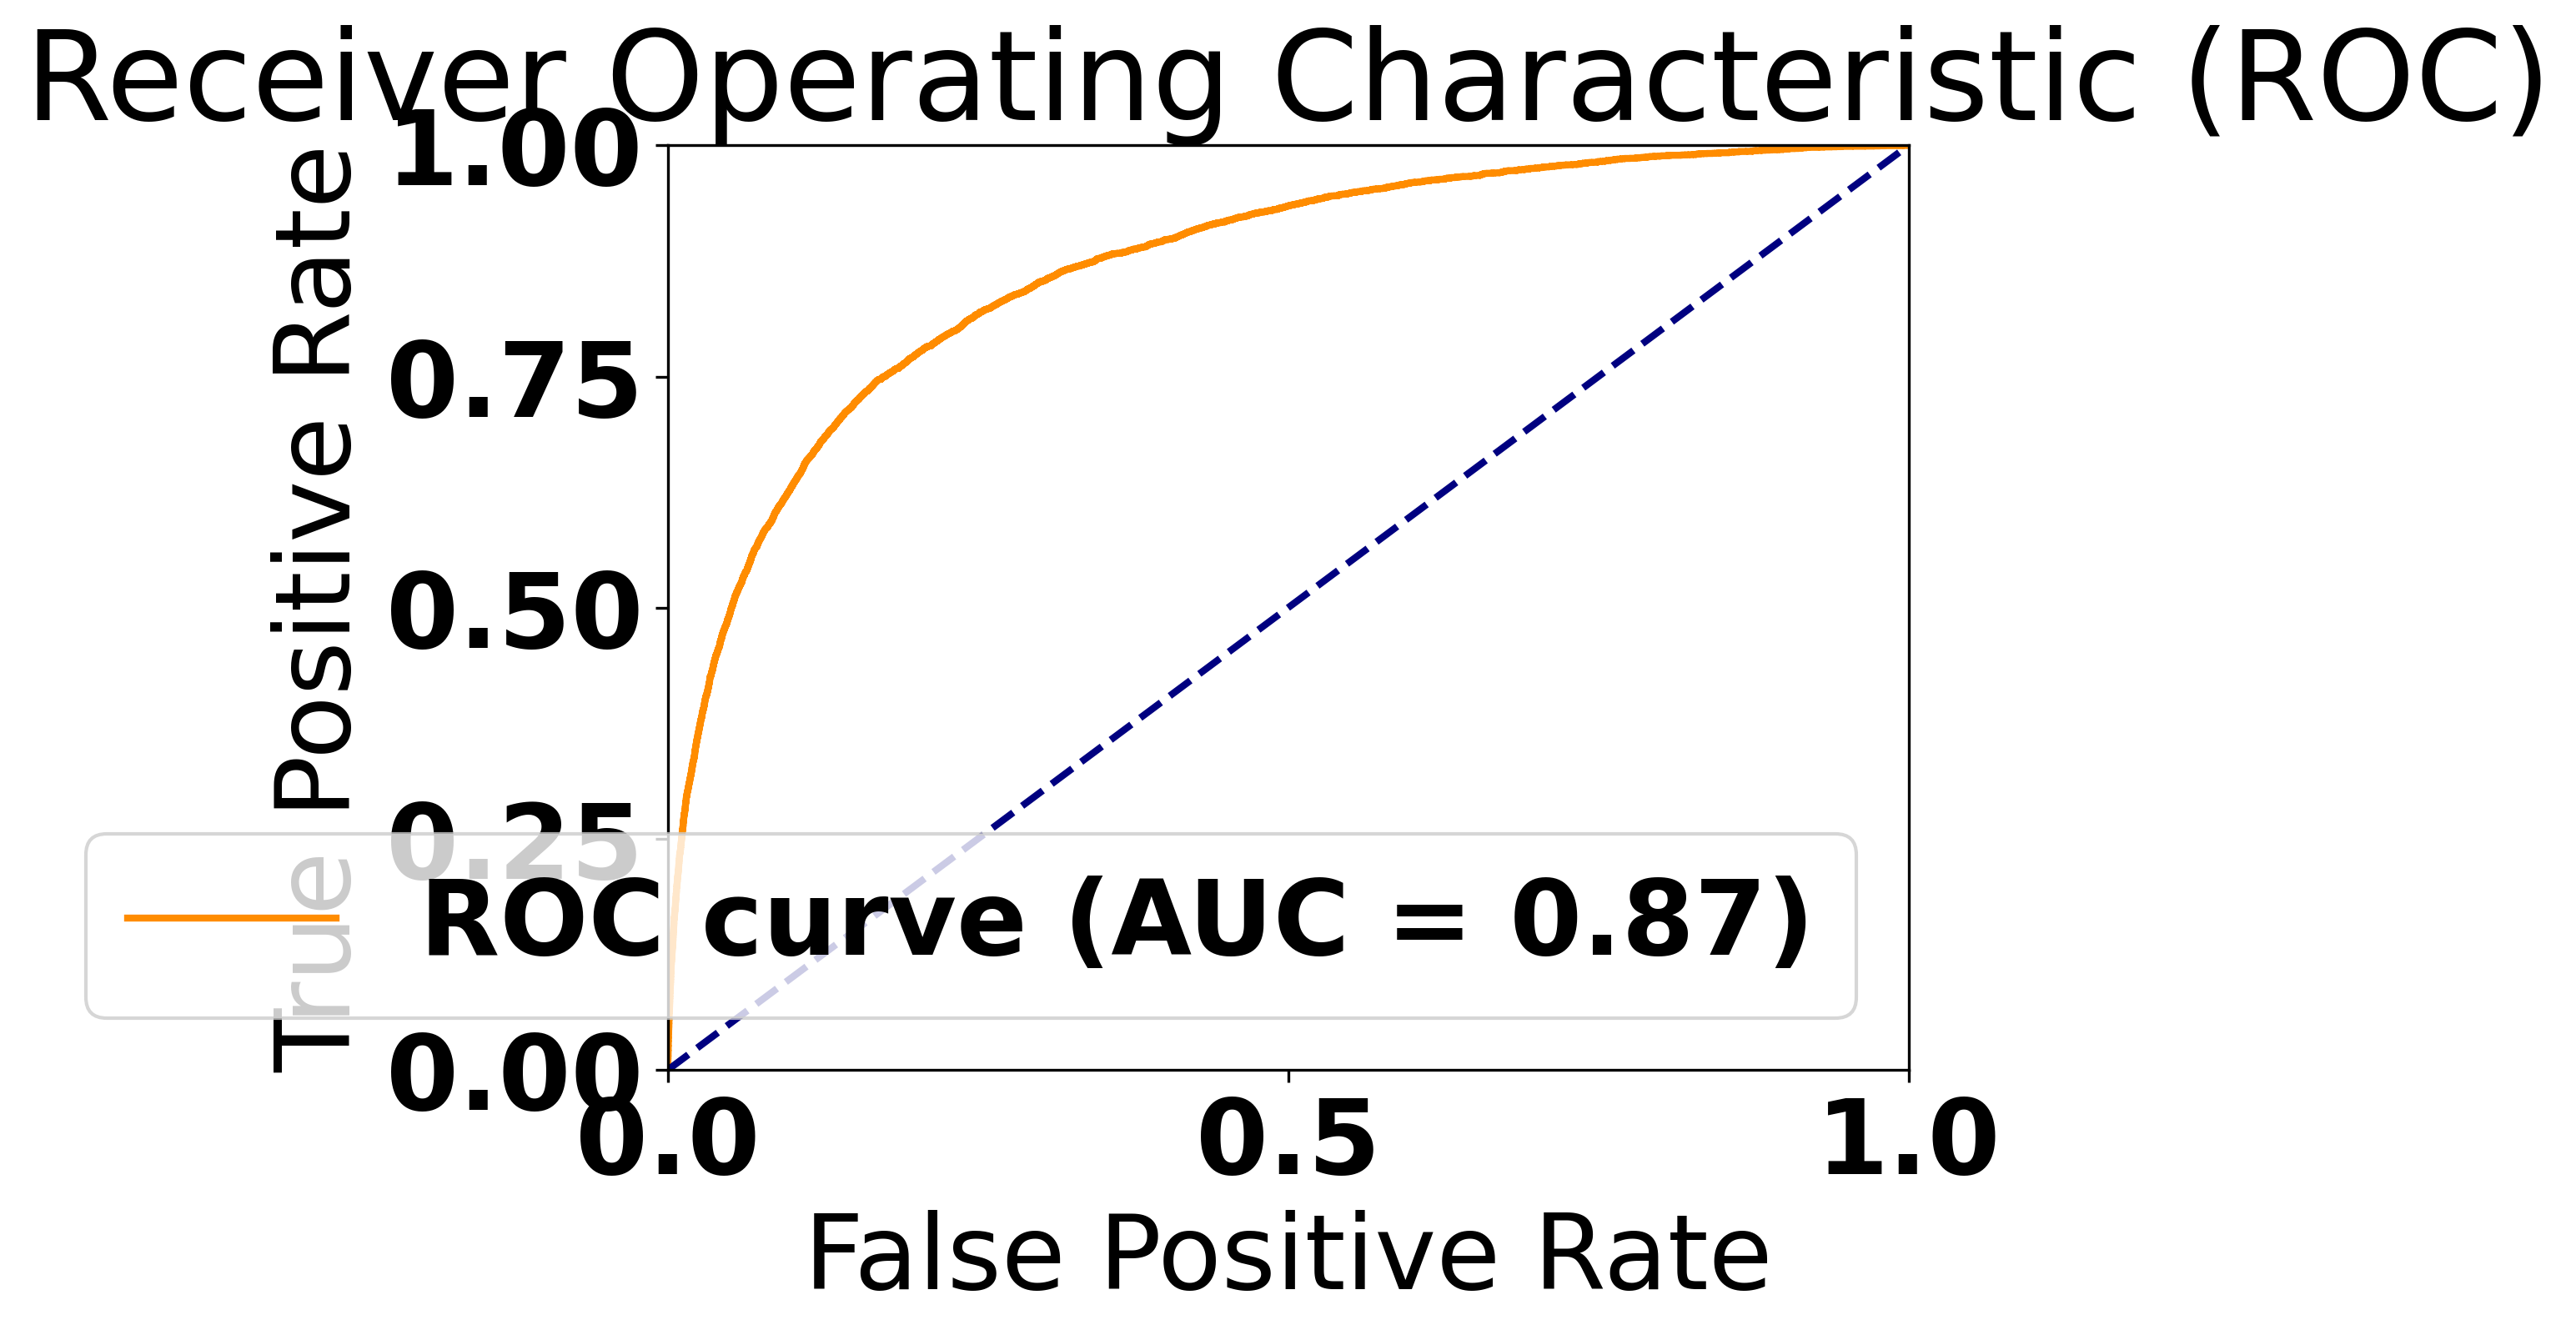

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate train accuracy
y_train_pred = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.898462763839108
Test Accuracy: 0.937129289950972


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
981/981 [==============================] - 31s 29ms/step - loss: 0.2855 - accuracy: 0.8887 - val_loss: 0.1655 - val_accuracy: 0.9440
Epoch 2/10
981/981 [==============================] - 30s 30ms/step - loss: 0.2661 - accuracy: 0.8957 - val_loss: 0.1748 - val_accuracy: 0.9407
Epoch 3/10
981/981 [==============================] - 25s 25ms/step - loss: 0.2623 - accuracy: 0.8976 - val_loss: 0.2008 - val_accuracy: 0.9361
Epoch 4/10
981/981 [==============================] - 23s 23ms/step - loss: 0.2604 - accuracy: 0.8980 - val_loss: 0.1731 - val_accuracy: 0.9396
Epoch 5/10
981/981 [==============================] - 23s 24ms/step - loss: 0.2594 - accuracy: 0.8983 - val_loss: 0.1803 - val_accuracy: 0.9396
Epoch 6/10
981/981 [==============================] - 27s 28ms/step - loss: 0.2584 - accuracy: 0.8991 - val_loss: 0.1772 - val_accuracy: 0.9396
Epoch 7/10
981/981 [==============================] - 23s 23ms/step - loss: 0.2576 - accuracy: 0.8996 - val_loss: 0.1839 - val_accuracy:

3646/3646 [==============================] - 11s 3ms/step
Normalized Confusion Matrix:
[[0.97466479 0.02533521]
 [0.62584421 0.37415579]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97    110005
     Class 1       0.47      0.37      0.42      6663

    accuracy                           0.94    116668
   macro avg       0.72      0.67      0.69    116668
weighted avg       0.93      0.94      0.94    116668



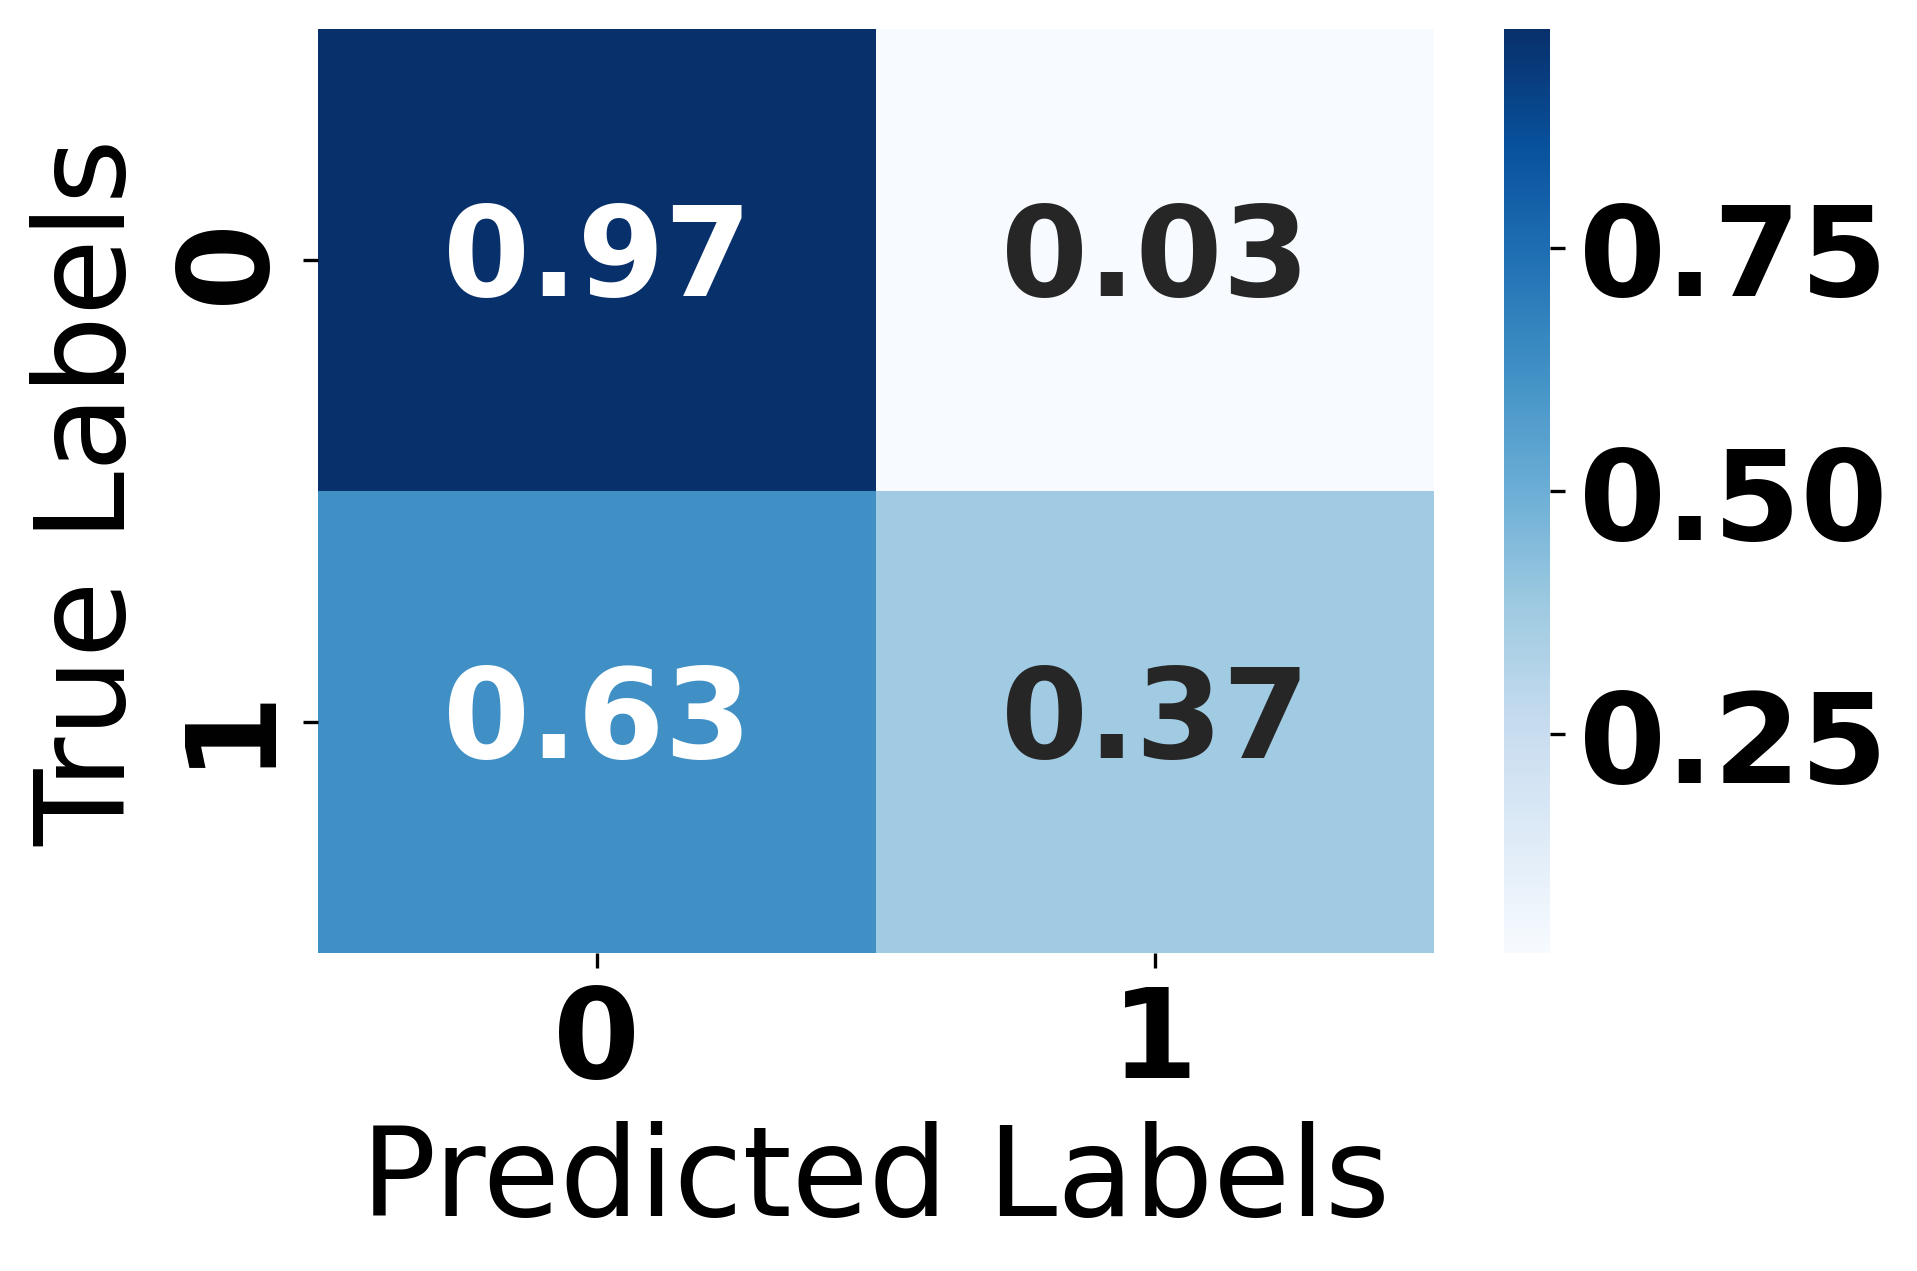

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.8798 - loss: 0.3228 - val_accuracy: 0.9367 - val_loss: 0.1800
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.8965 - loss: 0.2654 - val_accuracy: 0.9390 - val_loss: 0.1764
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.8987 - loss: 0.2605 - val_accuracy: 0.9441 - val_loss: 0.1700
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8973 - loss: 0.2615 - val_accuracy: 0.9435 - val_loss: 0.1741
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8982 - loss: 0.2594 - val_accuracy: 0.9389 - val_loss: 0.1753
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9003 - loss: 0.2558 - val_accuracy: 0.9422 - val_loss: 0.1691
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8990 - loss: 0.2586 - val_accuracy: 0.9386 - val_loss: 0.1734
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9000 - loss: 0.2556 - 

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
Normalized Confusion Matrix:
[[0.97760102 0.02239898]
 [0.64295362 0.35704638]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97    110005
     Class 1       0.49      0.36      0.41      6663

    accuracy                           0.94    116668
   macro avg       0.73      0.67      0.69    116668
weighted avg       0.93      0.94      0.94    116668



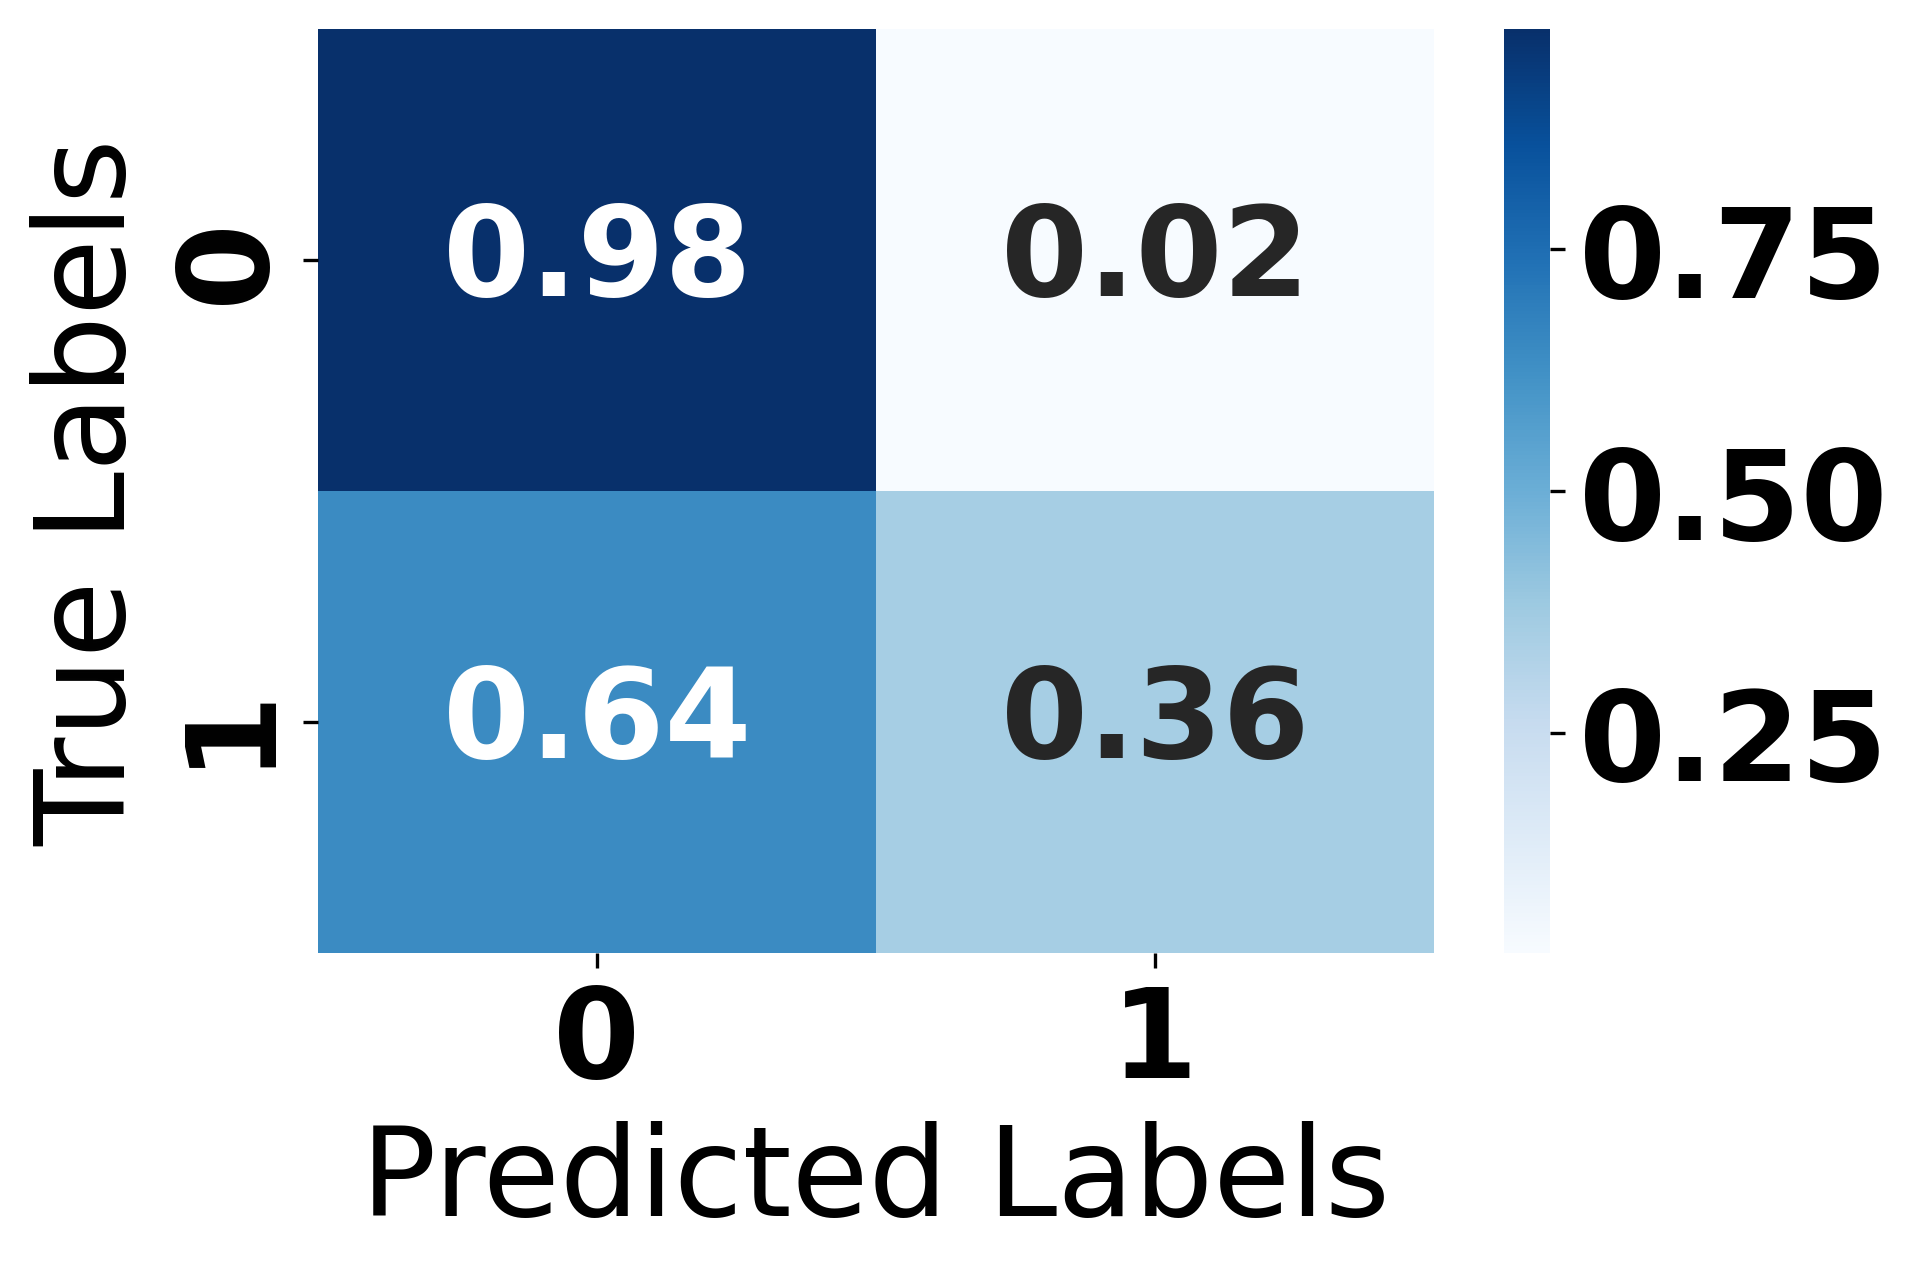

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
AUC Score: 0.8684025216186979


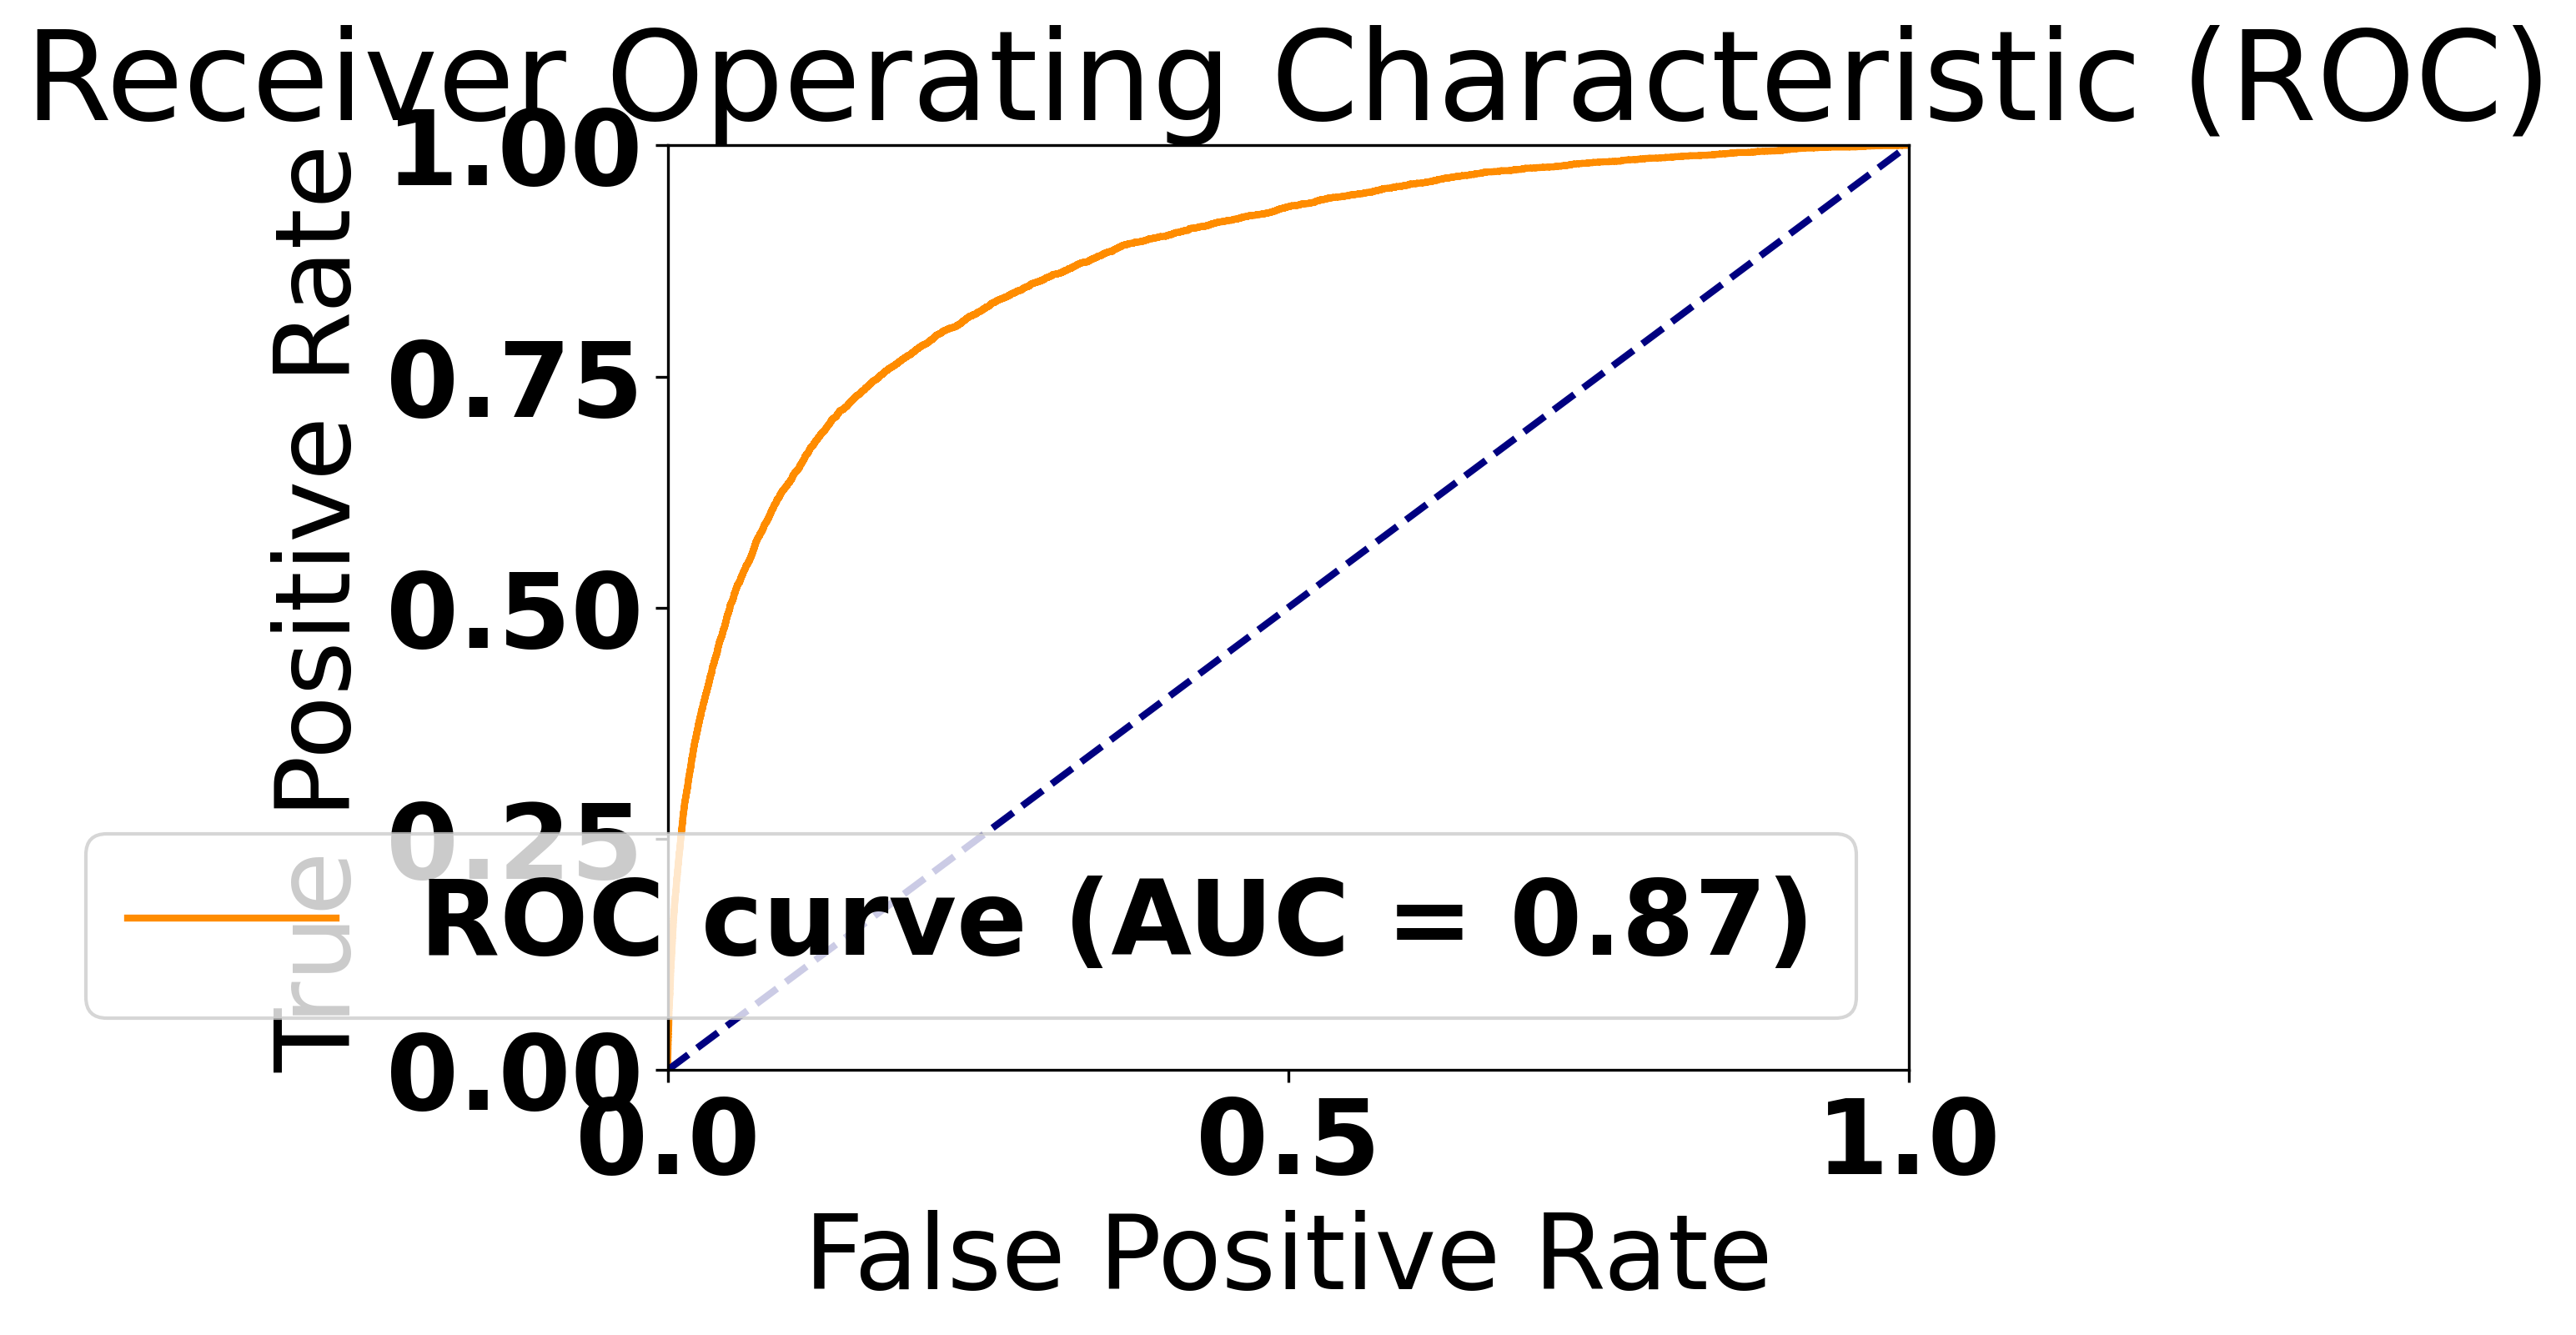

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict(x_test).flatten()

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8258 - loss: 0.4179 - val_accuracy: 0.9432 - val_loss: 0.1670
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8930 - loss: 0.2754 - val_accuracy: 0.9454 - val_loss: 0.1696
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8930 - loss: 0.2721 - val_accuracy: 0.9417 - val_loss: 0.1879
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8945 - loss: 0.2683 - val_accuracy: 0.9426 - val_loss: 0.1719
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8968 - loss: 0.2652 - val_accuracy: 0.9428 - val_loss: 0.1806
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8959 - loss: 0.2654 - val_accuracy: 0.9336 - val_loss: 0.1822
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8963 - loss: 0.2650 - val_accuracy: 0.9411 - val_loss: 0.1781
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8967 - loss: 0.2633 - val_accuracy

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Normalized Confusion Matrix:
[[0.9742739  0.0257261 ]
 [0.62299265 0.37700735]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97    110005
     Class 1       0.47      0.38      0.42      6663

    accuracy                           0.94    116668
   macro avg       0.72      0.68      0.69    116668
weighted avg       0.93      0.94      0.94    116668



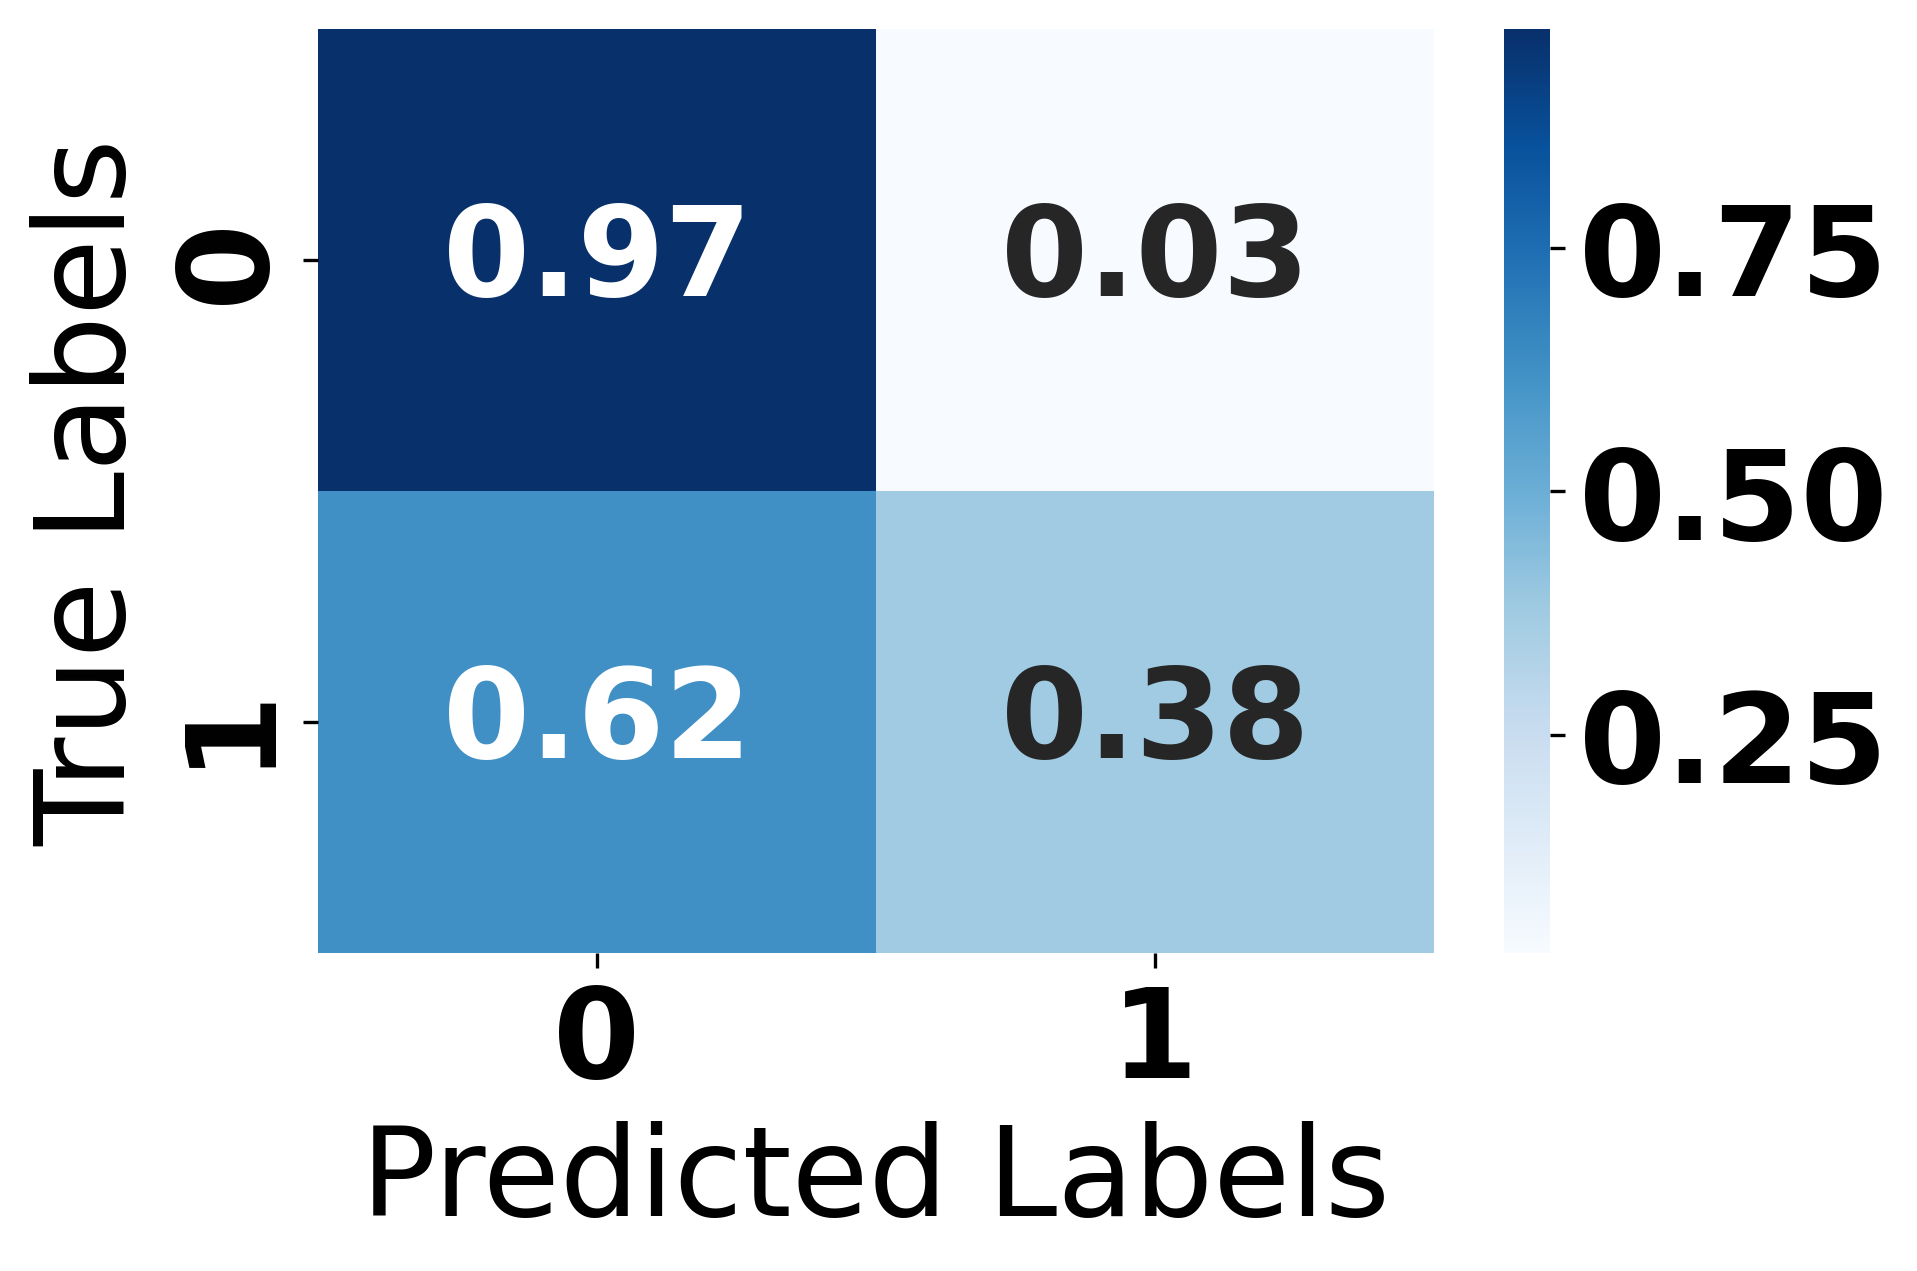

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
AUC Score: 0.86848755179514


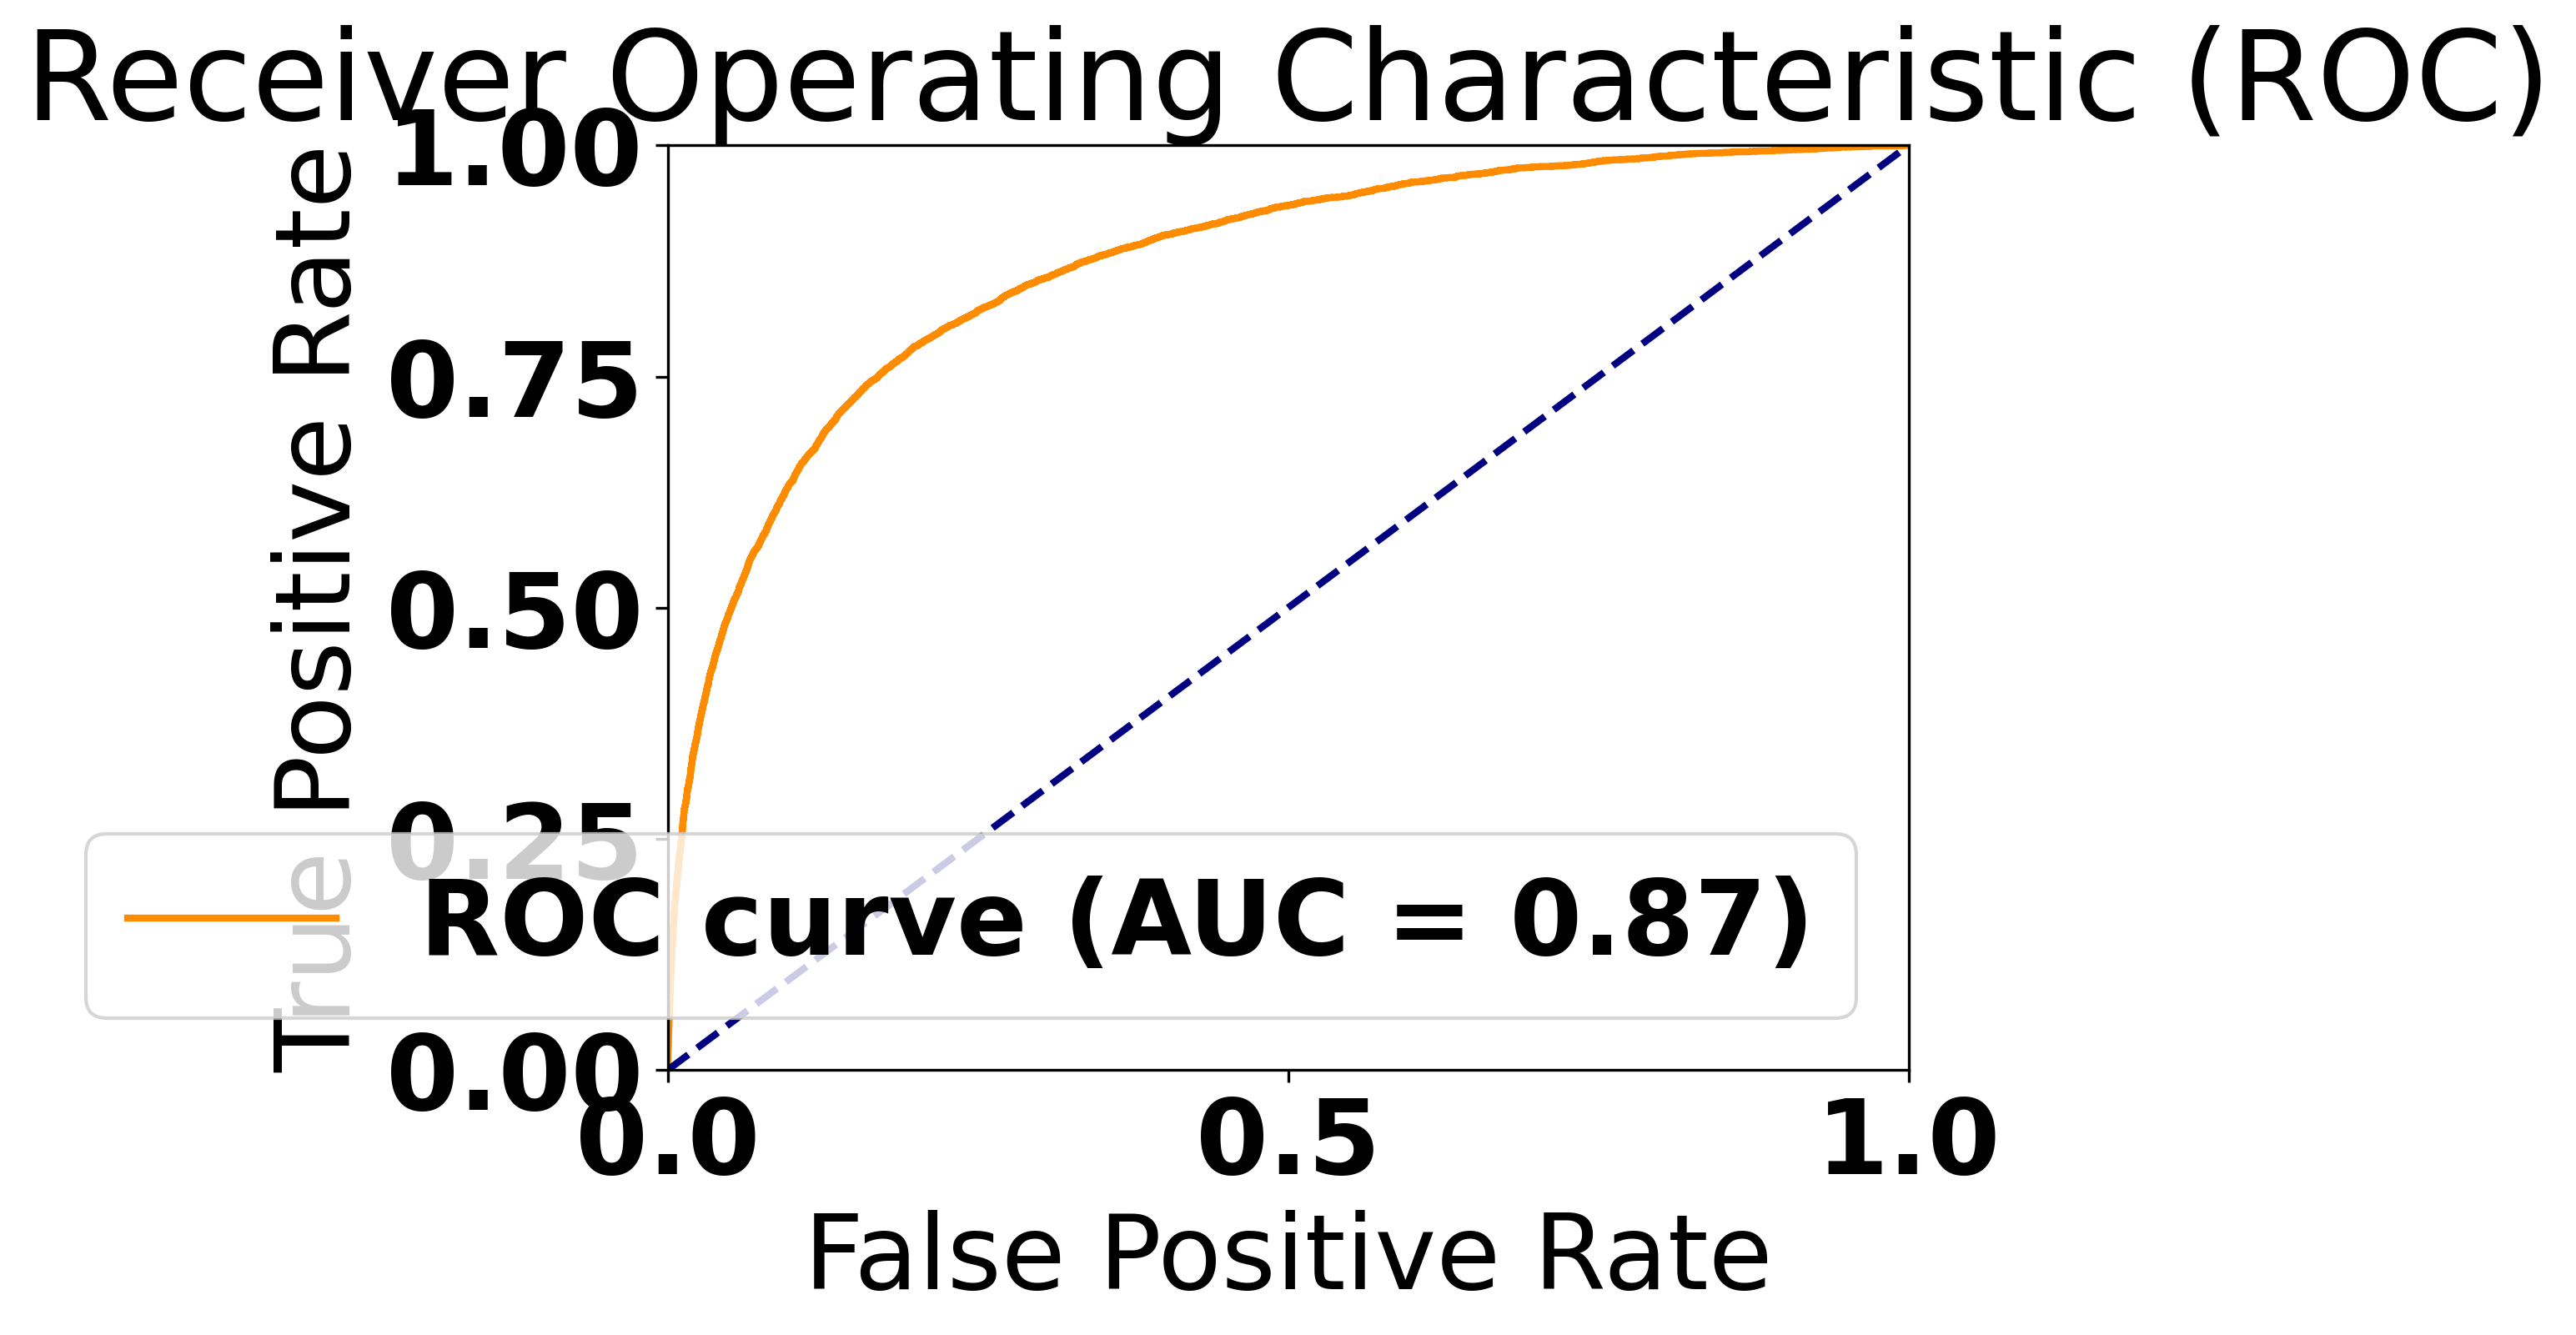

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = complex_ann_model.predict(x_test).flatten()

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
981/981 [==============================] - 13s 12ms/step - loss: 0.3313 - accuracy: 0.8681 - val_loss: 0.1814 - val_accuracy: 0.9373
Epoch 2/10
981/981 [==============================] - 9s 9ms/step - loss: 0.2734 - accuracy: 0.8930 - val_loss: 0.1778 - val_accuracy: 0.9448
Epoch 3/10
981/981 [==============================] - 9s 9ms/step - loss: 0.2685 - accuracy: 0.8953 - val_loss: 0.1677 - val_accuracy: 0.9418
Epoch 4/10
981/981 [==============================] - 9s 9ms/step - loss: 0.2661 - accuracy: 0.8955 - val_loss: 0.1671 - val_accuracy: 0.9439
Epoch 5/10
981/981 [==============================] - 8s 8ms/step - loss: 0.2654 - accuracy: 0.8962 - val_loss: 0.1789 - val_accuracy: 0.9404
Epoch 6/10
981/981 [==============================] - 8s 9ms/step - loss: 0.2642 - accuracy: 0.8960 - val_loss: 0.1749 - val_accuracy: 0.9402
Epoch 7/10
981/981 [==============================] - 7s 7ms/step - loss: 0.2637 - accuracy: 0.8964 - val_loss: 0.1824 - val_accuracy: 0.9393
Epoc

3646/3646 [==============================] - 7s 2ms/step
Normalized Confusion Matrix:
[[0.98113722 0.01886278]
 [0.67342038 0.32657962]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97    110005
     Class 1       0.51      0.33      0.40      6663

    accuracy                           0.94    116668
   macro avg       0.74      0.65      0.68    116668
weighted avg       0.93      0.94      0.94    116668



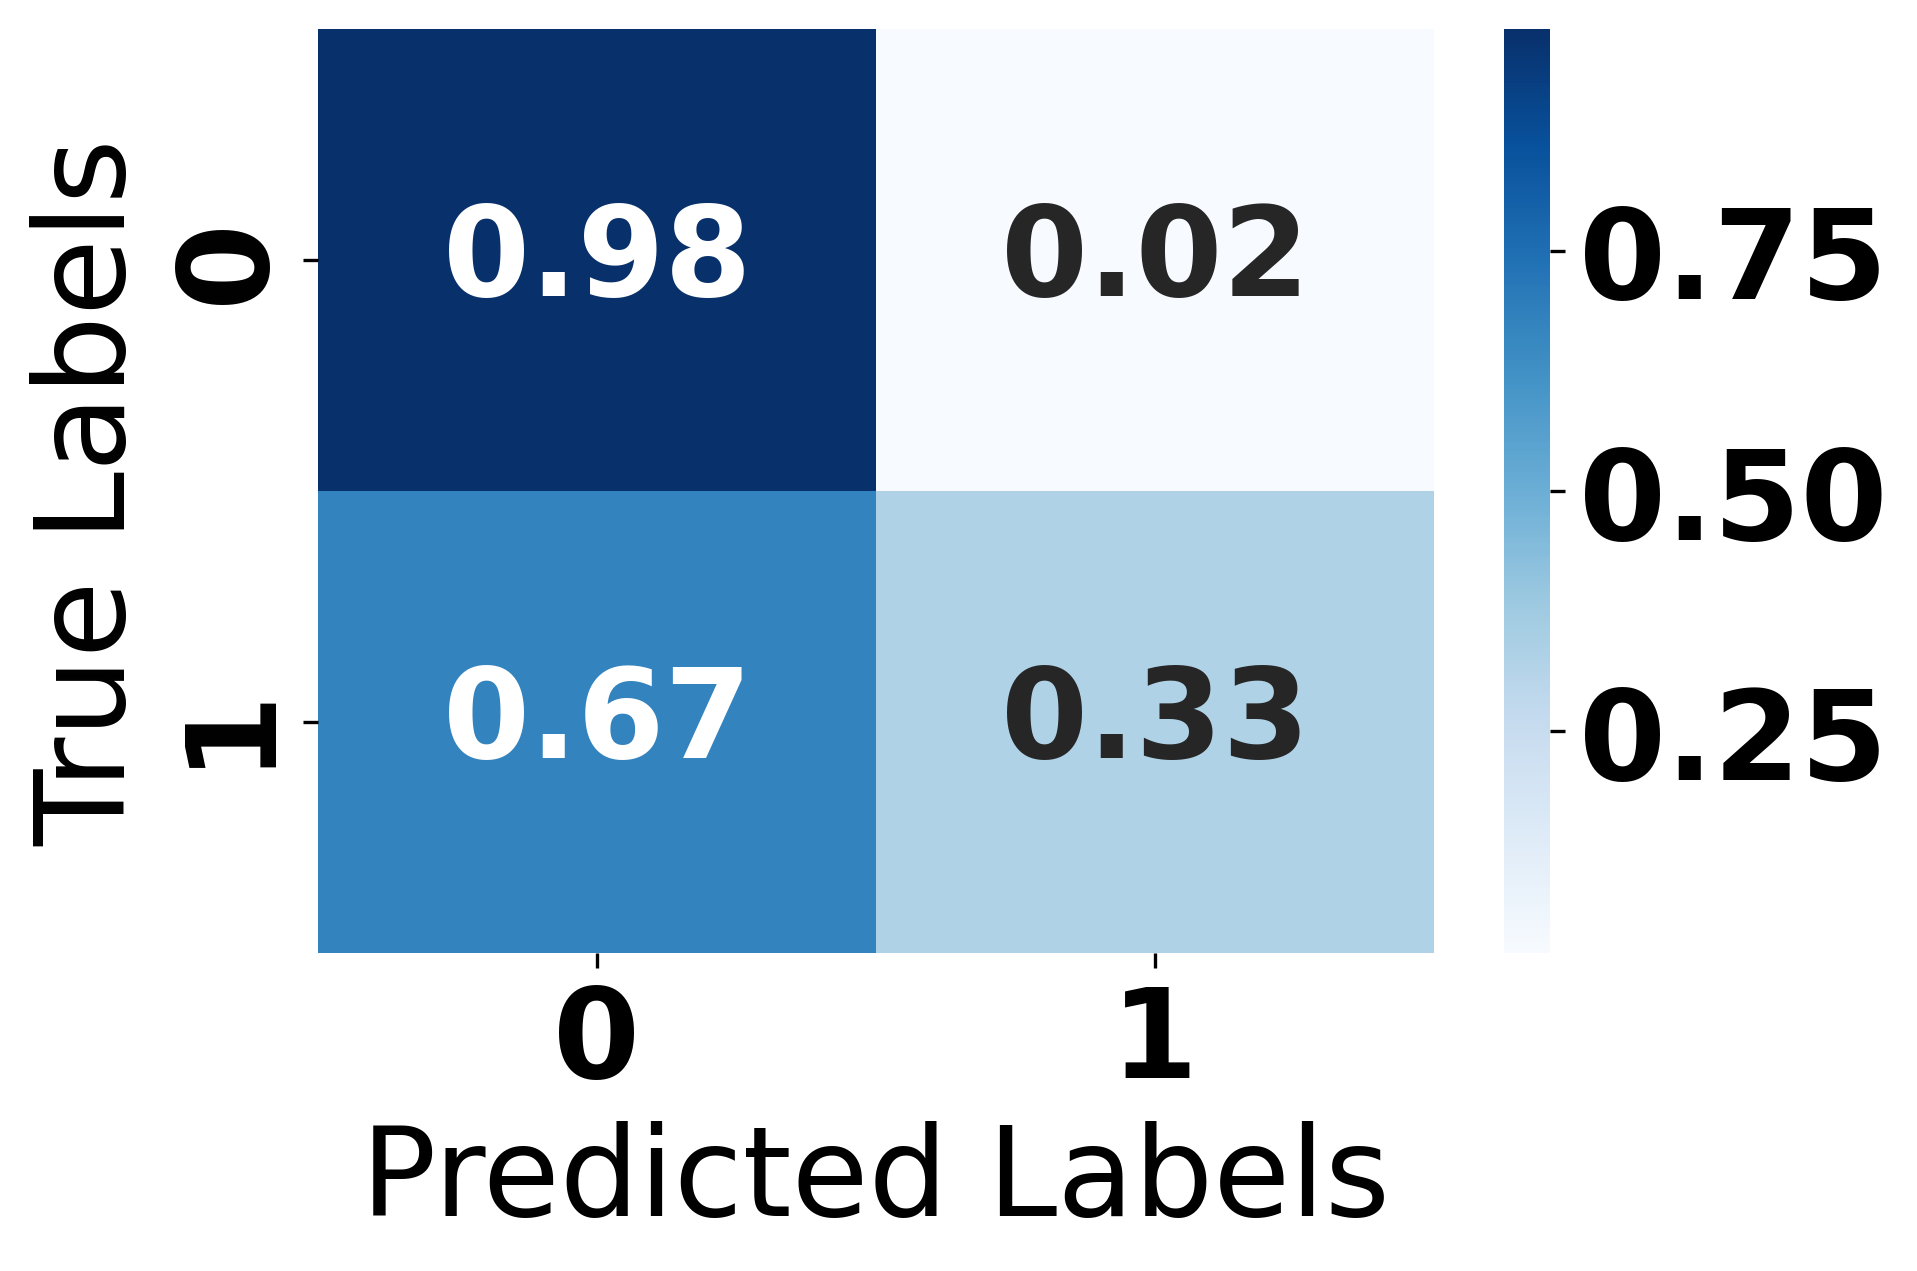

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Cost

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure training time
start_training_time = time.time()

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

end_training_time = time.time()
training_time = end_training_time - start_training_time
print("Training Time:", training_time)

# Measure test time
start_testing_time = time.time()

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)

end_testing_time = time.time()
testing_time = end_testing_time - start_testing_time

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Testing Time:", testing_time)

# Calculate computational time for the entire process (training + testing)
computational_time = training_time + testing_time
print("Total Computational Time:", computational_time)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8239 - loss: 0.4173 - val_accuracy: 0.9458 - val_loss: 0.1705
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8884 - loss: 0.2831 - val_accuracy: 0.9398 - val_loss: 0.1712
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8959 - loss: 0.2687 - val_accuracy: 0.9403 - val_loss: 0.1722
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8949 - loss: 0.2677 - val_accuracy: 0.9385 - val_loss: 0.1732
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8956 - loss: 0.2658 - val_accuracy: 0.9417 - val_loss: 0.1754
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8973 - loss: 0.2638 - val_accuracy: 0.9418 - val_loss: 0.1751
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8969 - loss: 0.2630 - val_accuracy: 0.9393 - val_loss: 0.1801
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8961 - loss: 0.2643 - val_accu

In [ ]:
complex_ann_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 33)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,349 (599.02 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 101,636 (397.02 KB)

In [ ]:
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, BatchNormalization, Dropout

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)
conv2 = BatchNormalization()(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = BatchNormalization()(residual1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Third convolutional block with residual connection
conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv3)
conv3 = BatchNormalization()(conv3)

# Residual connection
residual2 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
residual2 = BatchNormalization()(residual2)
residual2 = Add()([residual2, conv3])
pool3 = MaxPooling1D(pool_size=2)(residual2)

# Flatten layer
flatten = Flatten()(pool3)

# Dense layers with dropout
dense1 = Dense(256, activation='relu')(flatten)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(dense1)
dense2 = Dropout(0.5)(dense2)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure training time
start_time = time.time()

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

training_time = time.time() - start_time
print("Training Time:", training_time)

# Measure test time
start_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
testing_time = time.time() - start_time

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Testing Time:", testing_time)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.8767 - loss: 0.3340 - val_accuracy: 0.9433 - val_loss: 0.1658
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 59ms/step - accuracy: 0.8950 - loss: 0.2765 - val_accuracy: 0.9411 - val_loss: 0.2102
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.8954 - loss: 0.2706 - val_accuracy: 0.9444 - val_loss: 0.2105
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.8951 - loss: 0.2720 - val_accuracy: 0.9254 - val_loss: 0.2909
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.8971 - loss: 0.2670 - val_accuracy: 0.9453 - val_loss: 0.2096
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.8955 - loss: 0.2674 - val_accuracy: 0.9468 - val_loss: 0.2017
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.8954 - loss: 0.2681 - val_accuracy: 0.9339 - val_loss: 0.2213
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.8973 - loss: 0.2641 - 

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step
Normalized Confusion Matrix:
[[0.99568201 0.00431799]
 [0.84676572 0.15323428]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97    110005
     Class 1       0.68      0.15      0.25      6663

    accuracy                           0.95    116668
   macro avg       0.82      0.57      0.61    116668
weighted avg       0.94      0.95      0.93    116668



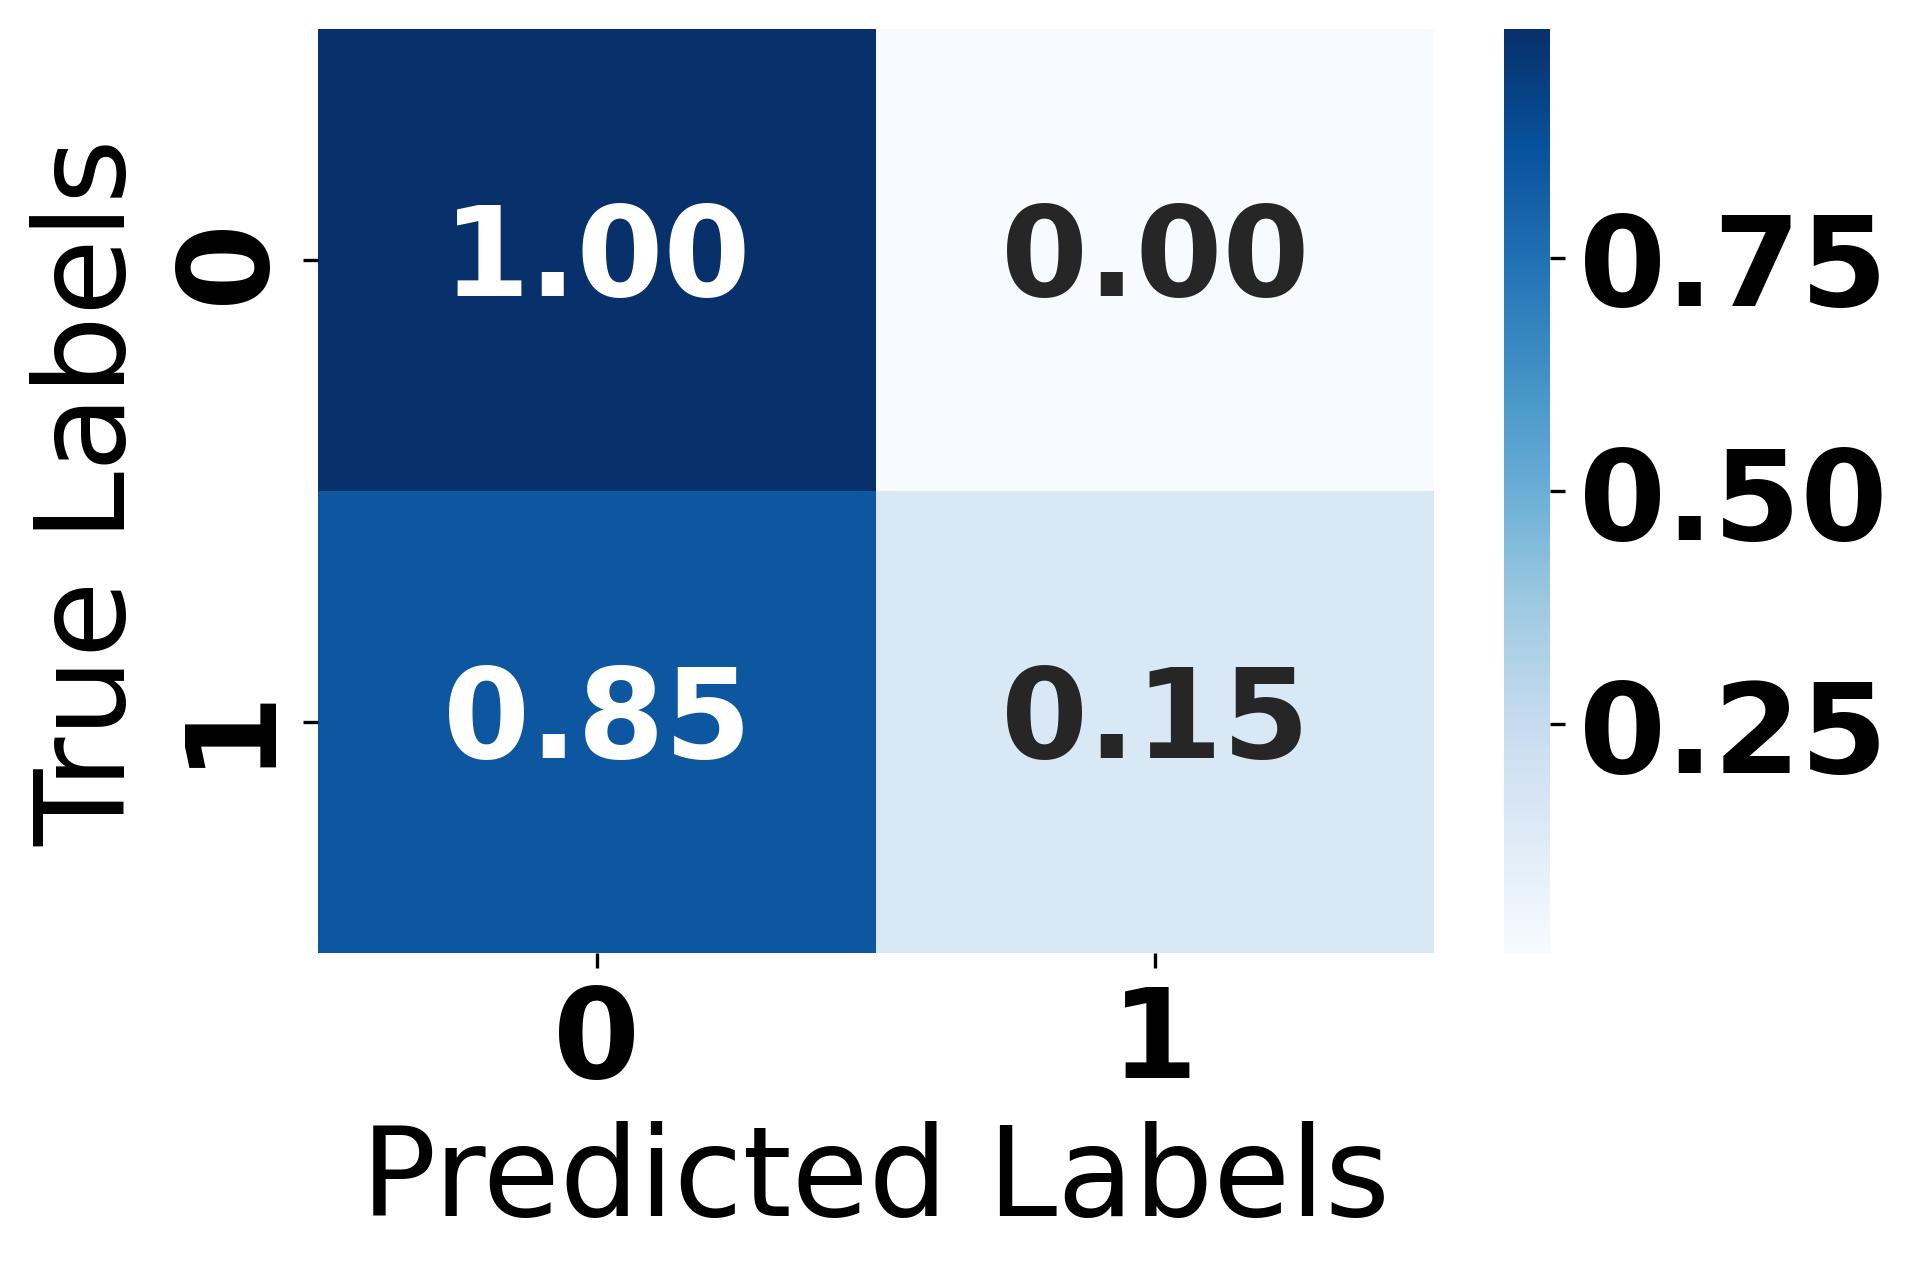

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 33, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 33, 32)         │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 33, 32)         │            128 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 16, 32)         │              0 │ batch_normalization[0… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 16, 64)         │          6,208 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 64)         │            256 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 16, 64)         │          2,112 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 16, 64)         │         12,352 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 64)         │            256 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16, 64)         │            256 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 16, 64)         │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 8, 64)          │              0 │ add[0][0]              │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 8, 128)         │         24,704 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 8, 128)         │            512 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 8, 128)         │          8,320 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)    

 Total params: 807,237 (3.08 MB)

 Trainable params: 268,673 (1.02 MB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 537,348 (2.05 MB)

In [ ]:
import time
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model

# Define a function to create the base CNN model
def base_cnn_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Convolutional layers with increased complexity
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
    conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv3)
    conv5 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv4)

    # Pooling layer
    pool = MaxPooling1D(pool_size=2)(conv5)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the base CNN model
input_shape = (x_train.shape[1], 1)
base_cnn_instance = base_cnn_model(input_shape)

# Compile the model
base_cnn_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Record the start time for training
train_start_time = time.time()

# Train the base CNN model
base_cnn_instance.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Record the end time for training
train_end_time = time.time()

# Calculate and print the training time
train_time = train_end_time - train_start_time
print(f"Training Time: {train_time:.2f} seconds")

# Record the start time for testing
test_start_time = time.time()

# Evaluate the base CNN model
loss, accuracy = base_cnn_instance.evaluate(x_test, y_test)

# Record the end time for testing
test_end_time = time.time()

# Calculate and print the testing time
test_time = test_end_time - test_start_time
print(f"Test Time: {test_time:.2f} seconds")

# Print the evaluation metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 214s 102ms/step - accuracy: 0.8703 - loss: 0.3409 - val_accuracy: 0.9399 - val_loss: 0.1774
Epoch 2/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 179s 90ms/step - accuracy: 0.8960 - loss: 0.2678 - val_accuracy: 0.9416 - val_loss: 0.1776
Epoch 3/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 203s 91ms/step - accuracy: 0.8956 - loss: 0.2666 - val_accuracy: 0.9466 - val_loss: 0.1663
Epoch 4/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 183s 93ms/step - accuracy: 0.8957 - loss: 0.2646 - val_accuracy: 0.9464 - val_loss: 0.1733
Epoch 5/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 198s 91ms/step - accuracy: 0.8971 - loss: 0.2641 - val_accuracy: 0.9214 - val_loss: 0.2598
Epoch 6/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 180s 92ms/step - accuracy: 0.8964 - loss: 0.2642 - val_accuracy: 0.9167 - val_loss: 0.2298
Epoch 7/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 199s 90ms/step - accuracy: 0.8976 - loss: 0.2614 - val_accuracy: 0.9443 - val_loss: 0.1633
Epoch 8/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 207s 93ms/step - accuracy:

In [ ]:
base_cnn_instance.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 33, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 33, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 33, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 33, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 33, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 33, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 16, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,205 (8.22 MB)

 Trainable params: 718,273 (2.74 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,436,548 (5.48 MB)

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step
Normalized Confusion Matrix:
[[0.99471842 0.00528158]
 [0.82920606 0.17079394]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97    110005
     Class 1       0.66      0.17      0.27      6663

    accuracy                           0.95    116668
   macro avg       0.81      0.58      0.62    116668
weighted avg       0.94      0.95      0.93    116668



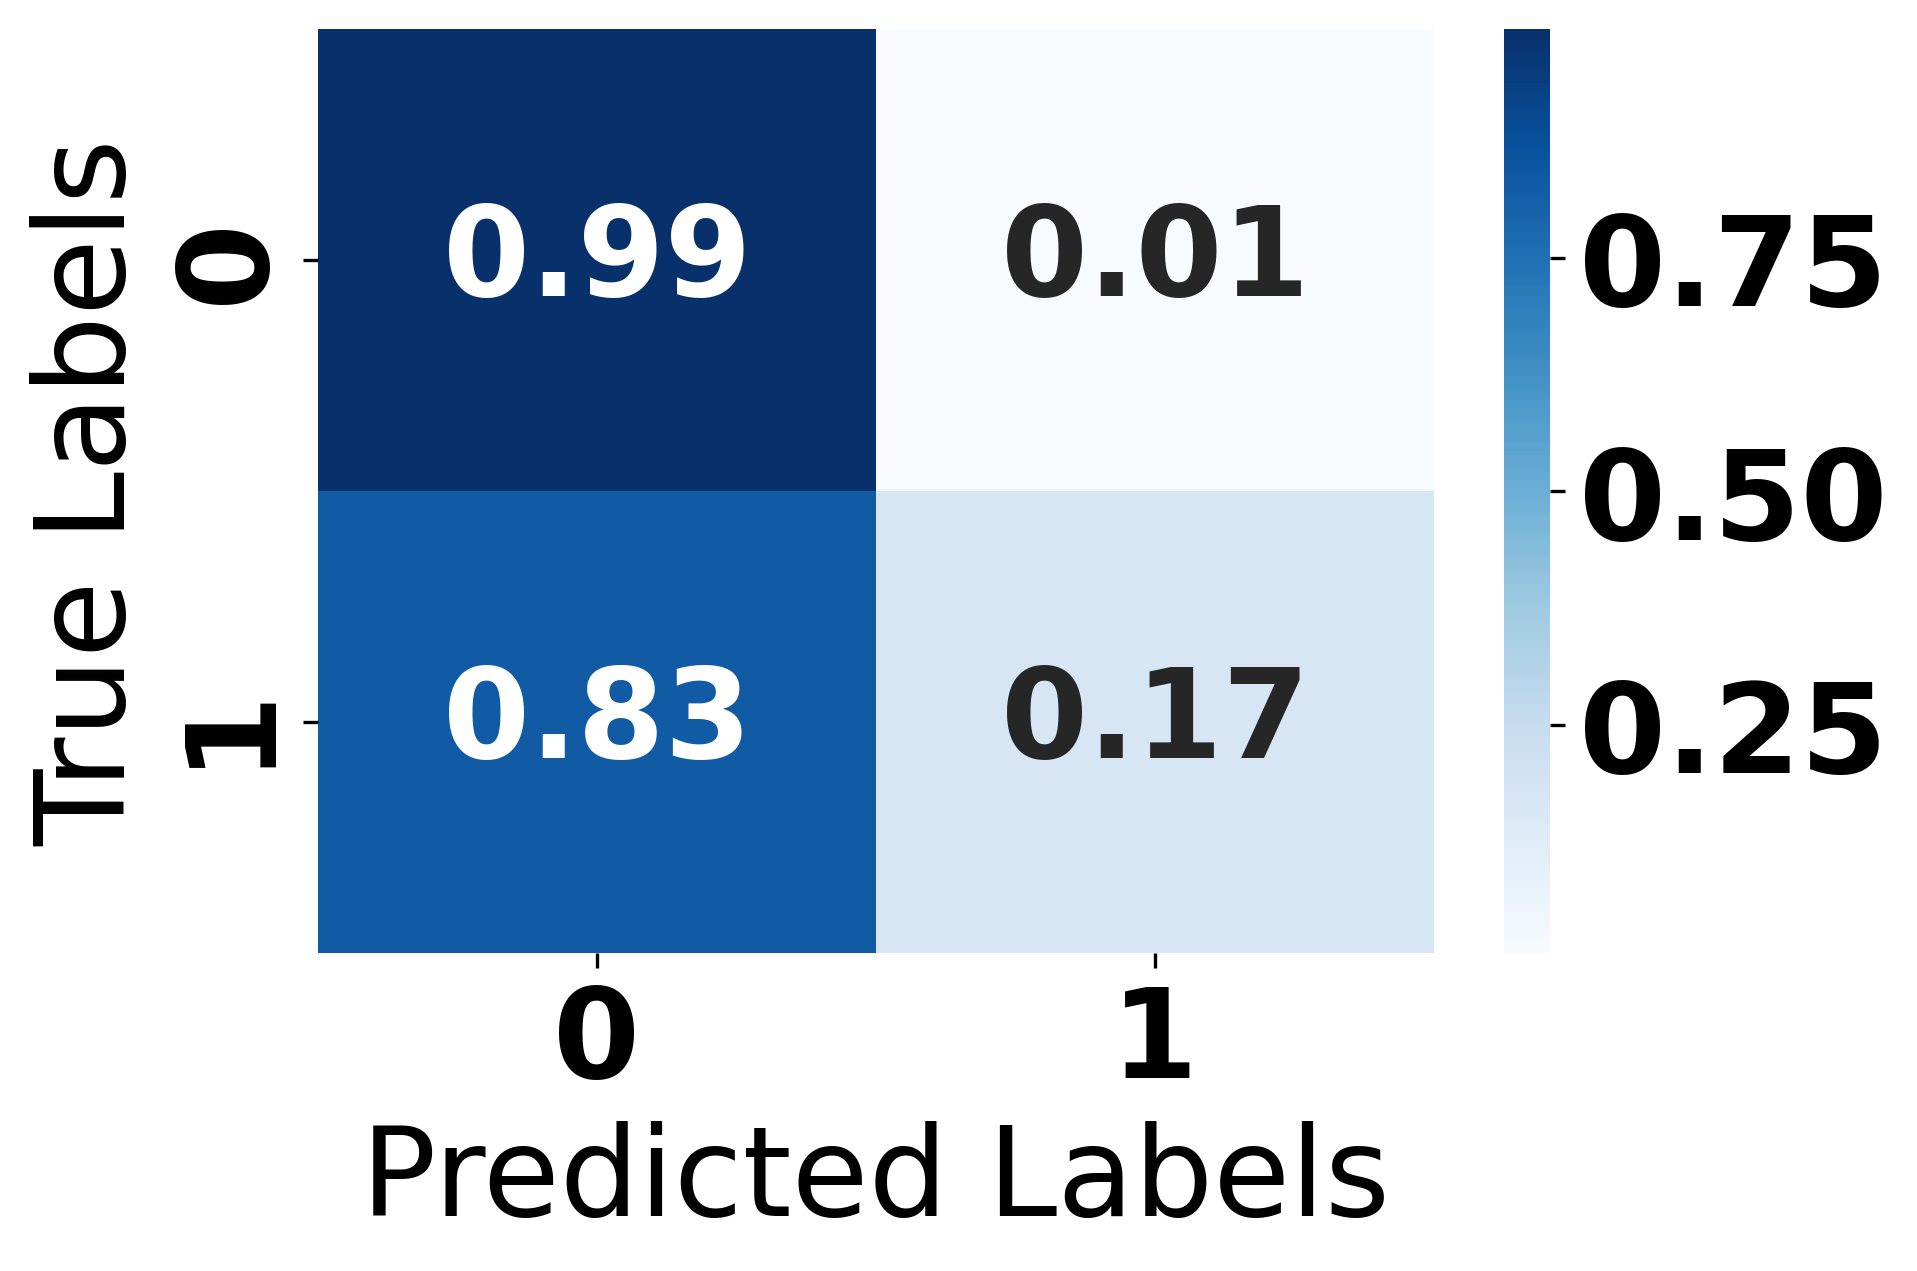

In [ ]:
# Predict probabilities on test data
y_pred_prob = base_cnn_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()